<a href="https://colab.research.google.com/github/Eezzeldin/POC/blob/logy/Profit_ML_V5_run0ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#pip install gplearn

In [4]:
#pip install tqdm

In [5]:
#pip install fitter

In [6]:
'''
from gplearn.genetic import SymbolicRegressor, SymbolicTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Generating some synthetic data for demonstration
# For example, let's try to discover the relationship y = x^2 - x + 1
X = np.linspace(-1, 1, 100).reshape(-1, 1)
y = X**2 - X + 1 + np.random.randn(*X.shape) * 0.1

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the symbolic regressor
est_gp = SymbolicRegressor(population_size=5000,
                           generations=3, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0 ,n_jobs=-1)
est_gp.fit(X_train, y_train)

# Making predictions
y_pred = est_gp.predict(X_test)

# Evaluating the model
print("Model expression:", est_gp._program)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
'''


'\nfrom gplearn.genetic import SymbolicRegressor, SymbolicTransformer\n\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import mean_squared_error\nimport numpy as np\n\n# Generating some synthetic data for demonstration\n# For example, let\'s try to discover the relationship y = x^2 - x + 1\nX = np.linspace(-1, 1, 100).reshape(-1, 1)\ny = X**2 - X + 1 + np.random.randn(*X.shape) * 0.1\n\n# Splitting data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)\n\n# Creating and training the symbolic regressor\nest_gp = SymbolicRegressor(population_size=5000,\n                           generations=3, stopping_criteria=0.01,\n                           p_crossover=0.7, p_subtree_mutation=0.1,\n                           p_hoist_mutation=0.05, p_point_mutation=0.1,\n                           max_samples=0.9, verbose=1,\n                           parsimony_coefficient=0.01, random_state=0 ,n_job

In [7]:
import pandas as pd
import numpy as np

import random

from gplearn.genetic import SymbolicRegressor, SymbolicTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt

In [8]:
'''
+The reason an MMC  has the Profit it does is :
- price, TIV decay
- R2 TIV , R2 Price

- Confidence measure : number of points.

- Year of Release (candidate for removal)

+missing from analysis :
TIV Launch price

+grouping variable    : Launch Price Bins.
+granularity variable : MMC
'''

'\n+The reason an MMC  has the Profit it does is :\n- price, TIV decay\n- R2 TIV , R2 Price\n\n- Confidence measure : number of points.\n\n- Year of Release (candidate for removal)\n\n+missing from analysis :\nTIV Launch price\n\n+grouping variable    : Launch Price Bins.\n+granularity variable : MMC\n'

In [9]:
input_file_path    = "/content/profit_pred_3.csv"

col_rename_dict = {
    "Launch Price (bin)"   : "LPB" ,
    'Avg. Launch Price'    : "LP"  ,
    "Avg. Launch TIV"      : "LTIV",
    "Model Memory Carrier" : "MMC" ,
    "Year of Release Date" : "Year",
    "Avg. Point Count 1000": "PC"  ,
    "Avg. Price decay"     : "Price_Decay",
    "Avg. Price rsquared"  : "Price_R2"  ,
    "Avg. TIV decay"       : "TIV_Decay" ,
    "Avg. TIV rsquared"    : "TIV_R2",
}
memory_name            = "M"
carrier_name           = "C"
carriers               = ['Verizon', 'Unlocked', 'AT&T', 'T-Mobile', 'Sprint']
carrier_replace_dict   = {}
for i,z in enumerate (carriers) : carrier_replace_dict [z] = i
online_features        = [carrier_name , memory_name ]
not_Features           = ["Profit" , "MMC" ]
Target                 = "Profit"
pred_col_name          = "Profit_Pred"

scaler_dict            = {}
interaction_1_name     = "Price_Decay_R2"
interaction_1_terms    = ["Price_R2" , "Price_Decay"]

grouping_col           = "LPB" # .astype("category")

number_of_test_per_fold = 1
fold_y_pred             = "fold_y_pred"
fold_test_index         = "fold_test_index"
fold_num                = 'fold_num'
fold_y_g_pred           = "fold_y_g_pred"

interaction       = True
one_hot           = True
scale_features    = True
drop_grouping_var = True
Kfold_symbolic    = True

cuttof_col_name       = "PC"
PC_cut_off            = False
cuttoff_threshold     = 20


#winner
generations=100
population_size=4000
hall_of_fame=200
n_components=10

#winner
generations=200 # * 2
population_size=8000 # * 2
hall_of_fame=100
n_components = 30
function_set_trans = ['add', 'sub', 'mul', 'div',
'sqrt', 'log', 'abs', 'neg', 'inv',
'max', 'min']
parsimony_coefficient_trans = 0.0005

#winner
generations=10 # * 2
population_size=800 # * 2
hall_of_fame = 200
n_components = 50
function_set_trans = ['add', 'sub', 'mul', 'div',
'sqrt', 'log', 'abs', 'neg', 'inv',
'max', 'min']
parsimony_coefficient_trans = 0.0005


#competitor
generations=10 # * 2
population_size=800 # * 2
hall_of_fame = 200
n_components = 50
function_set_trans = ['add', 'sub', 'mul', 'div',
'sqrt', 'log', 'abs', 'neg', 'inv',
'max', 'min']
parsimony_coefficient_trans = 0.0005



In [10]:
data_input  = pd.read_csv (input_file_path)
data_input.head ()

,Launch Price (bin),Model Memory Carrier,Year of Release Date,Avg. Launch Price,Avg. Launch TIV,Avg. Point Count 1000,Avg. Price decay,Avg. Price rsquared,Avg. TIV decay,Avg. TIV rsquared,Profit
0,1000,iPhone XS Max_512GB_Verizon,2018,1029.35,656.816,19,-0.001192,0.894662,-0.001335,0.879887,41381
1,1000,iPhone XS Max_512GB_Unlocked,2018,1014.39,634.388,20,-0.001009,0.911918,-0.001326,0.918513,227473
2,1000,iPhone XS Max_256GB_Unlocked,2018,1008.15,602.997,20,-0.001031,0.915380,-0.001333,0.932912,1514777
3,1000,iPhone X_256GB_Verizon,2017,1011.38,602.270,19,-0.001220,0.958448,-0.001388,0.895701,126462
4,900,iPhone XS Max_256GB_Verizon,2018,982.38,562.836,20,-0.001070,0.891031,-0.001114,0.860168,199737


In [11]:
data_input.shape

(114, 11)

In [12]:
data_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Launch Price (bin)     114 non-null    int64  
 1   Model Memory Carrier   114 non-null    object 
 2   Year of Release Date   114 non-null    int64  
 3   Avg. Launch Price      114 non-null    float64
 4   Avg. Launch TIV        114 non-null    float64
 5   Avg. Point Count 1000  114 non-null    int64  
 6   Avg. Price decay       114 non-null    float64
 7   Avg. Price rsquared    114 non-null    float64
 8   Avg. TIV decay         114 non-null    float64
 9   Avg. TIV rsquared      114 non-null    float64
 10  Profit                 114 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 9.9+ KB


In [13]:
data_input.columns

Index(['Launch Price (bin)', 'Model Memory Carrier', 'Year of Release Date',
       'Avg. Launch Price', 'Avg. Launch TIV', 'Avg. Point Count 1000',
       'Avg. Price decay', 'Avg. Price rsquared', 'Avg. TIV decay',
       'Avg. TIV rsquared', 'Profit'],
      dtype='object')

In [14]:
data_input.rename (col_rename_dict,axis =1 ,inplace=True)
data_input.head()

,LPB,MMC,Year,LP,LTIV,PC,Price_Decay,Price_R2,TIV_Decay,TIV_R2,Profit
0,1000,iPhone XS Max_512GB_Verizon,2018,1029.35,656.816,19,-0.001192,0.894662,-0.001335,0.879887,41381
1,1000,iPhone XS Max_512GB_Unlocked,2018,1014.39,634.388,20,-0.001009,0.911918,-0.001326,0.918513,227473
2,1000,iPhone XS Max_256GB_Unlocked,2018,1008.15,602.997,20,-0.001031,0.915380,-0.001333,0.932912,1514777
3,1000,iPhone X_256GB_Verizon,2017,1011.38,602.270,19,-0.001220,0.958448,-0.001388,0.895701,126462
4,900,iPhone XS Max_256GB_Verizon,2018,982.38,562.836,20,-0.001070,0.891031,-0.001114,0.860168,199737


In [15]:
data_input [grouping_col] = data_input [grouping_col].astype("category")

In [16]:
if PC_cut_off :
   c = data_input [cuttof_col_name] >= cuttoff_threshold
   data_input = data_input [c]

In [17]:
data_input.MMC.apply (lambda x : x.split ("_") [-1] ).unique()

array(['Verizon', 'Unlocked', 'AT&T', 'T-Mobile', 'Sprint'], dtype=object)

In [18]:
data_input [carrier_name] = data_input.MMC.apply (lambda x : x.split ("_") [-1] )
data_input.head ()

,LPB,MMC,Year,LP,LTIV,PC,Price_Decay,Price_R2,TIV_Decay,TIV_R2,Profit,C
0,1000,iPhone XS Max_512GB_Verizon,2018,1029.35,656.816,19,-0.001192,0.894662,-0.001335,0.879887,41381,Verizon
1,1000,iPhone XS Max_512GB_Unlocked,2018,1014.39,634.388,20,-0.001009,0.911918,-0.001326,0.918513,227473,Unlocked
2,1000,iPhone XS Max_256GB_Unlocked,2018,1008.15,602.997,20,-0.001031,0.915380,-0.001333,0.932912,1514777,Unlocked
3,1000,iPhone X_256GB_Verizon,2017,1011.38,602.270,19,-0.001220,0.958448,-0.001388,0.895701,126462,Verizon
4,900,iPhone XS Max_256GB_Verizon,2018,982.38,562.836,20,-0.001070,0.891031,-0.001114,0.860168,199737,Verizon


<Axes: xlabel='C', ylabel='Profit'>

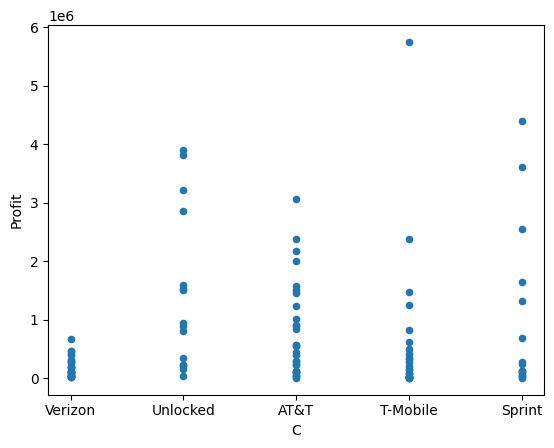

In [19]:
data_input.plot.scatter ("C" , "Profit")

In [20]:
data_input.MMC.apply (lambda x : int ( x.split ("_") [-2].split ("GB") [0] ) )

0      512
1      512
2      256
3      256
4      256
      ... 
109    256
110    128
111     32
112     32
113     32
Name: MMC, Length: 114, dtype: int64

In [21]:
data_input [memory_name] = data_input.MMC.apply (lambda x : int (x.split ("_") [-2].split ("GB") [0]) )
data_input

,LPB,MMC,Year,LP,LTIV,PC,Price_Decay,Price_R2,TIV_Decay,TIV_R2,Profit,C,M
0,1000,iPhone XS Max_512GB_Verizon,2018,1029.35,656.816,19,-0.001192,0.894662,-0.001335,0.879887,41381,Verizon,512
1,1000,iPhone XS Max_512GB_Unlocked,2018,1014.39,634.388,20,-0.001009,0.911918,-0.001326,0.918513,227473,Unlocked,512
2,1000,iPhone XS Max_256GB_Unlocked,2018,1008.15,602.997,20,-0.001031,0.915380,-0.001333,0.932912,1514777,Unlocked,256
3,1000,iPhone X_256GB_Verizon,2017,1011.38,602.270,19,-0.001220,0.958448,-0.001388,0.895701,126462,Verizon,256
4,900,iPhone XS Max_256GB_Verizon,2018,982.38,562.836,20,-0.001070,0.891031,-0.001114,0.860168,199737,Verizon,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,400,iPhone 7_256GB_T-Mobile,2016,423.30,238.041,17,-0.001130,0.944040,-0.001312,0.921607,9867,T-Mobile,256
110,400,iPhone 7_128GB_T-Mobile,2016,409.90,238.605,19,-0.001102,0.909587,-0.001330,0.925922,84340,T-Mobile,128
111,400,iPhone 7_32GB_AT&T,2016,423.82,230.749,20,-0.001262,0.929481,-0.001412,0.910493,397857,AT&T,32
112,400,iPhone 7 Plus_32GB_T-Mobile,2016,437.47,232.748,19,-0.000871,0.866634,-0.001058,0.933077,827457,T-Mobile,32


<Axes: xlabel='M', ylabel='Profit'>

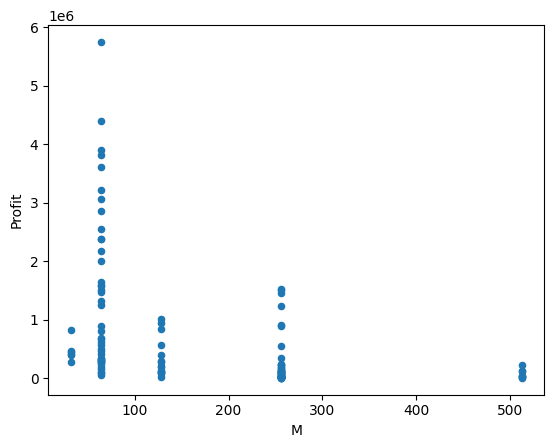

In [22]:
data_input.plot.scatter ("M" , "Profit")

In [23]:
if PC_cut_off :
   c = data_input [cuttof_col_name] >= cuttoff_threshold
   data_input = data_input [c]

In [24]:
data_input [grouping_col] = data_input [grouping_col].astype("category")

In [25]:
#data_input [interaction_1_name] = data_input [interaction_1_terms [0]]  * data_input [interaction_1_terms [1]]

In [26]:
X = data_input.drop (not_Features , axis=1)
y =  data_input [Target]

In [27]:
X.head ( )

,LPB,Year,LP,LTIV,PC,Price_Decay,Price_R2,TIV_Decay,TIV_R2,C,M
0,1000,2018,1029.35,656.816,19,-0.001192,0.894662,-0.001335,0.879887,Verizon,512
1,1000,2018,1014.39,634.388,20,-0.001009,0.911918,-0.001326,0.918513,Unlocked,512
2,1000,2018,1008.15,602.997,20,-0.001031,0.915380,-0.001333,0.932912,Unlocked,256
3,1000,2017,1011.38,602.270,19,-0.001220,0.958448,-0.001388,0.895701,Verizon,256
4,900,2018,982.38,562.836,20,-0.001070,0.891031,-0.001114,0.860168,Verizon,256


In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   LPB          114 non-null    category
 1   Year         114 non-null    int64   
 2   LP           114 non-null    float64 
 3   LTIV         114 non-null    float64 
 4   PC           114 non-null    int64   
 5   Price_Decay  114 non-null    float64 
 6   Price_R2     114 non-null    float64 
 7   TIV_Decay    114 non-null    float64 
 8   TIV_R2       114 non-null    float64 
 9   C            114 non-null    object  
 10  M            114 non-null    int64   
dtypes: category(1), float64(6), int64(3), object(1)
memory usage: 9.5+ KB


In [29]:
test_size      = int  (X.shape [0] * 0.3)

test_indicies  = X.sample (test_size).index.values
train_indicies = [i for i in X.index if i not in test_indicies]

X_train       = X.loc [train_indicies]
X_test        = X.loc [test_indicies]
y_train       = y.loc [train_indicies]
y_test        = y.loc [test_indicies]

In [30]:
y_train

1       227473
2      1514777
3       126462
6        35351
7        49720
        ...   
108     890989
109       9867
110      84340
111     397857
113     413425
Name: Profit, Length: 80, dtype: int64

2024-03-28 13:08:16.151 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.0)
2024-03-28 13:08:16.180 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.0)
2024-03-28 13:08:16.202 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.0)
2024-03-28 13:08:16.476 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-03-28 13:08:16.662 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=0.0)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,1.149951e-11,3277.774840,3284.920920,inf,0.085132,0.578244
beta,1.576556e-11,3172.179645,3181.707751,inf,0.133008,0.107538
gamma,1.596019e-11,3242.932919,3250.078999,inf,0.150452,0.047944
expon,2.500144e-11,3233.970543,3238.734596,inf,0.255132,0.000044
norm,3.997967e-11,3222.309547,3227.073601,inf,0.262710,0.000023


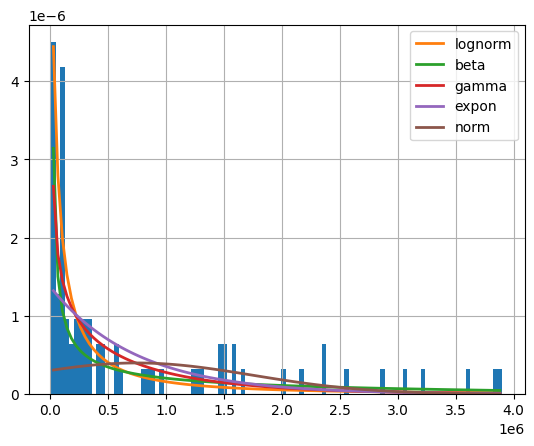

In [31]:
from fitter import Fitter
import numpy as np

# Assuming 'y' is your target variable, which is a NumPy array or a list of your data points
#y = np.random.normal(loc=0, scale=1, size=1000)  # Example data

# Create a Fitter instance with your data
f = Fitter(y_train.values, distributions=['gamma', 'lognorm', 'norm', 'expon', 'beta'] )  # Specify distributions you want to test

# Fit the distributions to your data and find the best fit
f.fit()
# This will fit all the distributions you've listed (or all available distributions if you don't specify) to your data

# Display the summary of the best fitting distributions
f.summary()


In [32]:
import scipy
from scipy.stats import *  # Import all distributions

# Fit the distributions and find the best
f = Fitter(y_train.values, distributions=['gamma', 'lognorm', 'norm', 'expon', 'beta'])
f.fit()
best_fit_name, best_fit_params = list(f.get_best(method='sumsquare_error').items())[0]
print (best_fit_name)
print (best_fit_params )
# Use the best fitting distribution's parameters to calculate the PDF values for y
# Check the name of the best fitting distribution and dynamically call the scipy.stats function
dist = getattr(scipy.stats, best_fit_name)  # Dynamically get the distribution class
pdf_values_y = dist.pdf(y_train, **best_fit_params)  # Calculate PDF values using the best fit parameters


2024-03-28 13:08:18.851 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.0)
2024-03-28 13:08:18.882 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.0)
2024-03-28 13:08:18.911 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.0)
2024-03-28 13:08:19.127 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-03-28 13:08:19.348 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=0.0)


lognorm
{'s': 1.8252538517484522, 'loc': 6860.783543561629, 'scale': 225779.21141857188}


In [33]:
pdf_values_y.shape

(80,)

In [34]:
pd.DataFrame (pdf_values_y).describe()

,0
count,8.000000e+01
mean,1.525244e-06
std,1.602023e-06
min,1.663370e-08
25%,1.154814e-07
50%,8.074052e-07
75%,2.304128e-06
max,5.052230e-06


array([[<Axes: title={'center': '0'}>]], dtype=object)

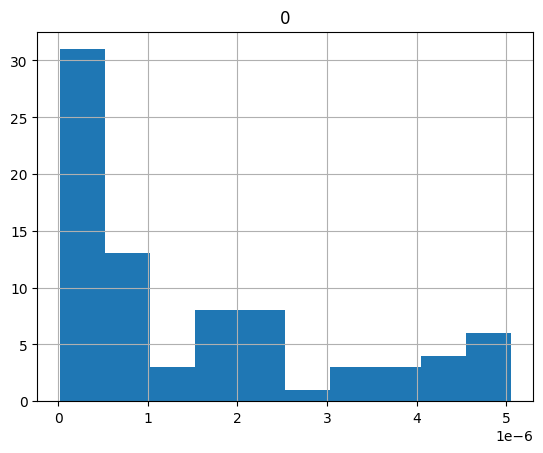

In [35]:
pd.DataFrame (pdf_values_y).hist()

In [36]:
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Define the log transformation
log_transformer = FunctionTransformer(np.log1p, validate=True)

# Define the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Create a pipeline that applies log transformation first, then MinMaxScaler
pipeline_y = Pipeline(steps=[('log', log_transformer),
                           ('minmax', min_max_scaler)])
#y_train_scaled = pipeline_y.fit_transform(y_train)

In [37]:
#scaler_dict  [Target] = MinMaxScaler().fit (y_train.values.reshape (-1,1))
scaler_dict  [Target] = pipeline_y.fit (y_train.values.reshape (-1,1))
y_train_scaled        = scaler_dict  [Target].transform (y_train.values.reshape (-1,1))
y_train_scaled        = y_train_scaled + 0.000000001

In [39]:
np.expm1 ( scaler_dict  [Target].inverse_transform (y_train_scaled ) )

array([[ 227473.00138631],
       [1514777.00923159],
       [ 126462.00077071],
       [  35351.00021545],
       [  49720.00030302],
       [ 351604.0021428 ],
       [ 122394.00074592],
       [ 116343.00070904],
       [1452793.00885384],
       [ 315383.00192206],
       [3220899.0196293 ],
       [  34911.00021277],
       [ 303392.00184898],
       [2857260.01741316],
       [  19257.00011737],
       [ 179596.00109453],
       [ 134977.0008226 ],
       [1229447.00749269],
       [  11238.00006849],
       [  12707.00007745],
       [  99099.00060395],
       [ 804002.00489988],
       [1644980.0100251 ],
       [2174113.01324982],
       [ 352733.00214969],
       [1579163.00962398],
       [  17750.00010818],
       [ 279454.0017031 ],
       [ 110921.000676  ],
       [  71406.00043518],
       [ 567515.00345864],
       [ 148986.00090798],
       [  98572.00060074],
       [ 944712.00575741],
       [3604646.02196799],
       [  92765.00056535],
       [ 330826.00201618],
 

In [38]:
pd.DataFrame (y_train_scaled).describe()

,0
count,8.000000e+01
mean,1.673605e-01
std,2.388925e-01
min,1.000000e-09
25%,1.736214e-02
50%,5.622294e-02
75%,2.026730e-01
max,1.000000e+00


array([[<Axes: title={'center': '0'}>]], dtype=object)

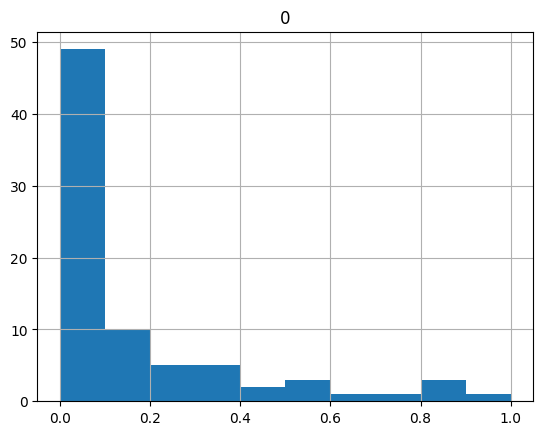

In [39]:
pd.DataFrame (y_train_scaled).hist()

In [40]:
y_train_scaled.shape

(80, 1)

In [41]:
X_train.shape

(80, 11)

In [42]:
X.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   LPB          114 non-null    category
 1   Year         114 non-null    int64   
 2   LP           114 non-null    float64 
 3   LTIV         114 non-null    float64 
 4   PC           114 non-null    int64   
 5   Price_Decay  114 non-null    float64 
 6   Price_R2     114 non-null    float64 
 7   TIV_Decay    114 non-null    float64 
 8   TIV_R2       114 non-null    float64 
 9   C            114 non-null    object  
 10  M            114 non-null    int64   
dtypes: category(1), float64(6), int64(3), object(1)
memory usage: 9.5+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from gplearn.genetic import SymbolicTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV , KFold, cross_val_predict , LeaveOneOut
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


#Setup for handling categorical and numerical features
categorical_features = [carrier_name]  # Example categorical feature
numerical_features   = X.drop(categorical_features , axis =1).columns.values.tolist()          # Add your numerical feature names here

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

poly_minmax_pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('minmax_scaler', MinMaxScaler())
])

symbolic_pipeline = Pipeline([
    ('symbolic_transform', SymbolicTransformer(generations=20, population_size=2000,
                                               hall_of_fame=49, n_components=10,
                                               function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 'inv', 'max', 'min'),
                                               parsimony_coefficient=0.0005, max_samples=0.9, verbose=0, n_jobs=-1))
])

# Combine PolynomialFeatures + MinMaxScaler and SymbolicTransformer
combined_features = FeatureUnion([
    ("poly_minmax", poly_minmax_pipeline),
    ("symbolic_transform_pipeline", symbolic_pipeline),
])

# Full pipeline: preprocess categorical and numerical features, then apply combined features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', combined_features, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])



# Define the parameter space for RandomizedSearchCV
param_distributions = {
    'preprocessor__num__poly_minmax__poly__degree': [randint (1,3).rvs() for _ in range (100)],
    'preprocessor__num__poly_minmax__poly__interaction_only' : [True,False],
    'preprocessor__num__symbolic_transform_pipeline__symbolic_transform__population_size': [randint (50,100).rvs () for _ in range (100)],
    'preprocessor__num__symbolic_transform_pipeline__symbolic_transform__generations': [randint (5,30).rvs() for _ in range (100)],
    #'features__symbolic_transform__hall_of_fame': [randint (5,30).rvs () for _ in range (100)],
    #'features__symbolic_transform__hall_of_fame': [i // 2 for i in param_distributions ['features__symbolic_transform__population_size']],
    'preprocessor__num__symbolic_transform_pipeline__symbolic_transform__n_components': [randint (1,49).rvs () for _ in range (100)],
    #'regressor': np.random.choice ([LinearRegression()]),
    #'regressor__max_iter': [randint (100,10000).rvs () for _ in range (100)],
    'regressor__n_estimators': [randint (3000,5000).rvs () for _ in range (100)] ,
    'regressor__max_depth': randint(3, 10).rvs (size = 100),
    'regressor__max_features': loguniform(1e-2, 0.5).rvs (size = 100),
    #'regressor__final_estimator__alpha': loguniform(1e-2, 10).rvs (size = 100) ,
    #'regressor__mlp__activation': ['identity', 'logistic', 'tanh', 'relu'],

}



cv     = 10
cv     = LeaveOneOut ()
cv     = 20
n_iter = 25
#neg_root_mean_squared_error
random_search = RandomizedSearchCV(pipeline, param_distributions=param_distributions,
                                   n_iter=n_iter, verbose=50,cv = cv , scoring = 'neg_root_mean_squared_error') #error_score='raise' , ValueError: Input X contains infinity or a value too large for dtype('float32').

random_search.fit (X_train,y_train_scaled.ravel())
print (random_search.best_score_)
print (random_search.best_params_)

import pickle

# Save the pipeline
#3 prod PC cutoff
with open('/content/drive/MyDrive/Colab Notebooks/saved_pipeline_4.pkl', 'wb') as f:
    pickle.dump(random_search, f)


Fitting 20 folds for each of 25 candidates, totalling 500 fits
[CV 1/20; 1/25] START preprocessor__num__poly_minmax__poly__degree=2, preprocessor__num__poly_minmax__poly__interaction_only=True, preprocessor__num__symbolic_transform_pipeline__symbolic_transform__generations=29, preprocessor__num__symbolic_transform_pipeline__symbolic_transform__n_components=29, preprocessor__num__symbolic_transform_pipeline__symbolic_transform__population_size=74, regressor__max_depth=5, regressor__max_features=0.03367233538814612, regressor__n_estimators=3230
[CV 1/20; 1/25] END preprocessor__num__poly_minmax__poly__degree=2, preprocessor__num__poly_minmax__poly__interaction_only=True, preprocessor__num__symbolic_transform_pipeline__symbolic_transform__generations=29, preprocessor__num__symbolic_transform_pipeline__symbolic_transform__n_components=29, preprocessor__num__symbolic_transform_pipeline__symbolic_transform__population_size=74, regressor__max_depth=5, regressor__max_features=0.033672335388146

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from gplearn.genetic import SymbolicTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV , KFold, cross_val_predict , LeaveOneOut
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [41]:
import pickle
# Load the pipeline
with open('/content/drive/MyDrive/Colab Notebooks/saved_pipeline_4.pkl', 'rb') as f:
    random_search = pickle.load(f)

In [ ]:
random_search

RandomizedSearchCV(cv=20,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               FeatureUnion(transformer_list=[('poly_minmax',
                                                                                                               Pipeline(steps=[('poly',
                                                                                                                                PolynomialFeatures(include_bias=False)),
                                                                                                                               ('minmax_scaler',
                                                                                                                                MinMaxScaler())])),
                                                                                                              ('symbolic_transform_pipeline',
                                                                                                               Pipeline(steps=[('symbolic_transform',
                                                                                                                                SymbolicTransformer(function_...
       0.10467489, 0.22973496, 0.01046293, 0.04445873, 0.01356101,
       0.19268229, 0.01604906, 0.13854511, 0.01647317, 0.08020954,
       0.25216621, 0.0193245 , 0.13593547, 0.01534155, 0.40346806]),
                                        'regressor__n_estimators': [4909, 3344,
                                                                    4262, 3193,
                                                                    4782, 4668,
                                                                    4184, 4145,
                                                                    4627, 4371,
                                                                    3244, 4318,
                                                                    4283, 3480,
                                                                    3992, 3069,
                                                                    3977, 3914,
                                                                    4156, 4008,
                                                                    3300, 4260,
                                                                    3369, 4921,
                                                                    4844, 4279,
                                                                    3672, 4566,
                                                                    3088, 4935, ...]},
                   scoring='neg_root_mean_squared_error', verbose=50)

In [ ]:
 pd.DataFrame (random_search.cv_results_).sort_values("rank_test_score").head ()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__n_estimators,param_regressor__max_features,param_regressor__max_depth,param_preprocessor__num__symbolic_transform_pipeline__symbolic_transform__population_size,param_preprocessor__num__symbolic_transform_pipeline__symbolic_transform__n_components,param_preprocessor__num__symbolic_transform_pipeline__symbolic_transform__generations,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
21,8.773525,0.917810,0.137590,0.024556,3777,0.048632,7,94,16,28,...,-0.070776,-0.112756,-0.075576,-0.229928,-0.096179,-0.417309,-0.191419,-0.130639,0.084513,1
20,10.149597,0.653536,0.180846,0.038039,4839,0.177758,9,80,9,28,...,-0.060441,-0.060730,-0.105738,-0.248430,-0.076741,-0.381002,-0.255598,-0.132799,0.084702,2
9,8.221168,0.775177,0.120104,0.022506,3191,0.036226,7,98,20,28,...,-0.075933,-0.068094,-0.092305,-0.282070,-0.104706,-0.417222,-0.197081,-0.134413,0.088775,3
12,8.268005,0.619106,0.168148,0.035685,4436,0.160789,9,50,36,22,...,-0.062175,-0.091848,-0.094424,-0.238149,-0.112096,-0.378066,-0.327902,-0.136177,0.088745,4
19,7.932423,0.764571,0.129928,0.025616,3499,0.03903,5,80,16,27,...,-0.063439,-0.072749,-0.055678,-0.261006,-0.101413,-0.414077,-0.214705,-0.138085,0.093018,5


In [ ]:
random_search.predict (X_train)

array([0.03853555, 0.06203517, 0.03051365, 0.41579049, 0.14350695,
       0.28281909, 0.0243471 , 0.14918951, 0.04679172, 0.18295859,
       0.25666342, 0.30794946, 0.0806984 , 0.12017022, 0.05387228,
       0.11677161, 0.19170678, 0.04517114, 0.14616474, 0.54824885,
       0.07343098, 0.23074191, 0.21912456, 0.20104396, 0.10548175,
       0.07033213, 0.43047526, 0.52167576, 0.05625914, 0.10426417,
       0.17913553, 0.08119001, 0.07271751, 0.30205642, 0.16497135,
       0.06689384, 0.520031  , 0.59470273, 0.0499572 , 0.23670153,
       0.64678684, 0.48307412, 0.30416828, 0.2346255 , 0.21023679,
       0.28927692, 0.28046036, 0.15230005, 0.17465959])

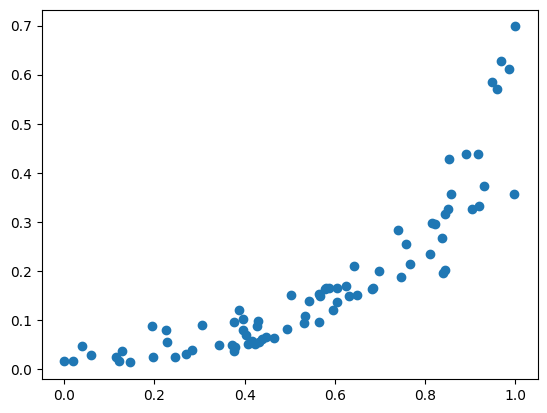

In [42]:
#kf = KFold(n_splits=10, shuffle=True, random_state=42)
#y_val_pred = cross_val_predict(random_search, X_train,y_train_scaled.ravel(), cv=kf)
fig, ax = plt.subplots()

ax.scatter(y_train_scaled,random_search.predict (X_train))
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

In [ ]:
random_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  FeatureUnion(transformer_list=[('poly_minmax',
                                                                                  Pipeline(steps=[('poly',
                                                                                                   PolynomialFeatures(degree=1,
                                                                                                                      include_bias=False,
                                                                                                                      interaction_only=True)),
                                                                                                  ('minmax_scaler',
                                                                                                   MinMaxScaler())])),
                                                                                 ('symbolic_transform_pipeline',
                                                                                  Pipeline(steps=[('symbolic_transform',
                                                                                                   SymbolicTransformer(function_set=...
                                                                                                                       max_samples=0.9,
                                                                                                                       n_components=5,
                                                                                                                       n_jobs=-1,
                                                                                                                       parsimony_coefficient=0.0005,
                                                                                                                       population_size=82))]))]),
                                                  ['LPB', 'Year', 'LP', 'LTIV',
                                                   'Price_Decay', 'Price_R2',
                                                   'TIV_Decay', 'TIV_R2',
                                                   'M']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['C'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=8,
                                       max_features=0.2984943572178944,
                                       n_estimators=4880))])

In [ ]:
random_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('features',
                 FeatureUnion(transformer_list=[('poly_minmax',
                                                 Pipeline(steps=[('poly',
                                                                  PolynomialFeatures(include_bias=False,
                                                                                     interaction_only=True)),
                                                                 ('minmax_scaler',
                                                                  MinMaxScaler())])),
                                                ('symbolic_transform',
                                                 SymbolicTransformer(function_set=('add',
                                                                                   'sub',
                                                                                   'mul',
                                                                                   'div',
                                                                                   'sqrt',
                                                                                   'log',
                                                                                   'abs',
                                                                                   'neg',
                                                                                   'inv',
                                                                                   'max',
                                                                                   'min'),
                                                                     generations=24,
                                                                     hall_of_fame=50,
                                                                     max_samples=0.9,
                                                                     n_components=49,
                                                                     n_jobs=-1,
                                                                     parsimony_coefficient=0.0005,
                                                                     population_size=67))])),
                ('regressor',
                 RandomForestRegressor(max_depth=6,
                                       max_features=0.0310890323724676,
                                       n_estimators=4991))])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  1.4min remaining:   21.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.7min finished


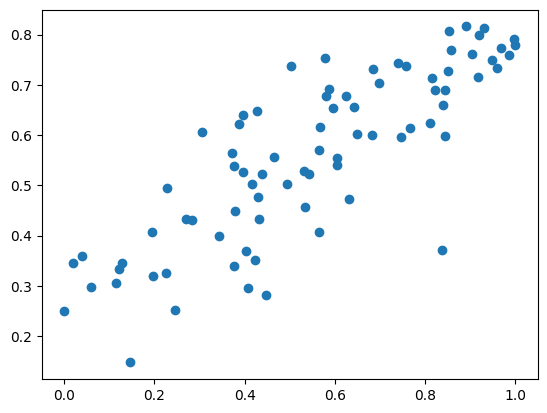

In [43]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
#LOO = LeaveOneOut (verbose = 50)
y_val_pred = cross_val_predict(random_search.best_estimator_,
                               X_train,y_train_scaled.ravel(),
                               cv=kf,
                               verbose=50,
                               n_jobs = -1)

fig, ax = plt.subplots()

ax.scatter(y_train_scaled,y_val_pred)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

In [ ]:
#kf = KFold(n_splits=10, shuffle=True, random_state=42)

LOO = LeaveOneOut ()
y_val_pred = cross_val_predict(random_search.best_estimator_,
                               X_train,y_train_scaled.ravel(), cv=LOO ,
                               verbose = 50,
                               n_jobs = -1)

fig, ax = plt.subplots()

ax.scatter(y_train_scaled,y_val_pred)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.2min


In [ ]:
from sklearn.model_selection import RandomizedSearchCV , KFold, cross_val_predict , LeaveOneOut
LOO = LeaveOneOut ()
y_val_pred = cross_val_predict(random_search.best_estimator_,
                               X_train,y_train_scaled.ravel(), cv=LOO ,
                               verbose = 50,
                               n_jobs = -1)

fig, ax = plt.subplots()

ax.scatter(y_train_scaled,y_val_pred)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

In [47]:
append_data = False
if append_data :
  append_d = data_input.copy ()
  scaler_dict [Target].inverse_transform (y_val_pred.reshape (-1,1))
  scaler_dict  [Target].inverse_transform (random_search.predict (X_test).reshape (-1,1) )

  append_d.loc [train_indicies,"preidcted"] = np.expm1 ( scaler_dict [Target].inverse_transform (y_val_pred.reshape (-1,1)) )
  append_d.loc [test_indicies,"preidcted"]  = np.expm1 ( scaler_dict  [Target].inverse_transform (random_search.predict (X_test).reshape (-1,1) ) )

  append_d.to_csv ("pred.csv")


In [ ]:
import pickle

# Save the pipeline
with open('saved_pipeline.pkl', 'wb') as f:
    pickle.dump(random_search.best_estimator_, f)


In [ ]:

# Load the pipeline
with open('saved_pipeline.pkl', 'rb') as f:
    loaded_pipeline = pickle.load(f)

In [ ]:
loaded_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('features',
                 FeatureUnion(transformer_list=[('poly_minmax',
                                                 Pipeline(steps=[('poly',
                                                                  PolynomialFeatures(degree=1,
                                                                                     include_bias=False,
                                                                                     interaction_only=True)),
                                                                 ('minmax_scaler',
                                                                  MinMaxScaler())])),
                                                ('symbolic_transform',
                                                 SymbolicTransformer(function_set=('add',
                                                                                   'sub',
                                                                                   'mul',
                                                                                   'div',
                                                                                   'sqrt',
                                                                                   'log',
                                                                                   'abs',
                                                                                   'neg',
                                                                                   'inv',
                                                                                   'max',
                                                                                   'min'),
                                                                     generations=8,
                                                                     hall_of_fame=50,
                                                                     max_samples=0.9,
                                                                     n_components=21,
                                                                     n_jobs=-1,
                                                                     parsimony_coefficient=0.0005,
                                                                     population_size=83))])),
                ('regressor', RandomForestRegressor(n_estimators=4772))])

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin, clone
clone (loaded_pipeline)

Pipeline(steps=[('scaler', StandardScaler()),
                ('features',
                 FeatureUnion(transformer_list=[('poly_minmax',
                                                 Pipeline(steps=[('poly',
                                                                  PolynomialFeatures(degree=1,
                                                                                     include_bias=False,
                                                                                     interaction_only=True)),
                                                                 ('minmax_scaler',
                                                                  MinMaxScaler())])),
                                                ('symbolic_transform',
                                                 SymbolicTransformer(function_set=('add',
                                                                                   'sub',
                                                                                   'mul',
                                                                                   'div',
                                                                                   'sqrt',
                                                                                   'log',
                                                                                   'abs',
                                                                                   'neg',
                                                                                   'inv',
                                                                                   'max',
                                                                                   'min'),
                                                                     generations=8,
                                                                     hall_of_fame=50,
                                                                     max_samples=0.9,
                                                                     n_components=21,
                                                                     n_jobs=-1,
                                                                     parsimony_coefficient=0.0005,
                                                                     population_size=83))])),
                ('regressor', RandomForestRegressor(n_estimators=4772))])

In [ ]:
y_train_scaled

array([[3.36331091e-02],
       [2.87776117e-02],
       [2.60433824e-01],
       [1.00000000e-09],
       [5.53636311e-02],
       [1.52378532e-02],
       [2.48139100e-01],
       [4.90227393e-02],
       [5.57665861e-01],
       [1.51993738e-01],
       [1.67635115e-02],
       [2.52517040e-02],
       [2.09039881e-01],
       [3.27599039e-02],
       [1.11598025e-02],
       [2.81783588e-01],
       [3.74414246e-01],
       [2.70261584e-01],
       [3.63864717e-02],
       [4.27329654e-02],
       [1.32293760e-02],
       [1.50373547e-01],
       [2.03198798e-02],
       [9.31612702e-02],
       [1.98930806e-02],
       [1.59193830e-01],
       [6.24845072e-01],
       [1.00509648e-02],
       [2.51553669e-01],
       [2.58124941e-01],
       [8.88015460e-02],
       [6.63056556e-01],
       [9.22036854e-02],
       [7.52647636e-02],
       [6.76416351e-01],
       [1.45894265e-02],
       [1.72232388e-01],
       [9.01530275e-03],
       [2.14153944e-01],
       [7.62736754e-01],


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   50.7s
[Parallel(

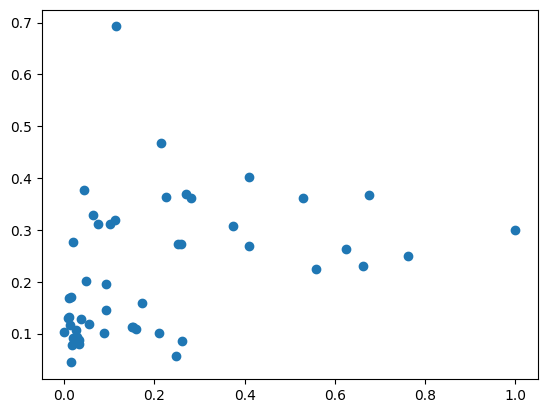

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.base import BaseEstimator, TransformerMixin, clone


rs          = clone (random_search.best_estimator_)
regressors  = [rs,rs, rs]
cv_strategy = KFold(n_splits=3, shuffle=True, random_state=42)
#cv_strategy = LeaveOneOut ()
X_augmented = X_train.copy()
for i,regressor in enumerate ( regressors[:-1]):  # Exclude the last regressor for now
    # Generate cross-validated predictions
    predictions = cross_val_predict(regressor, X_augmented, y_train_scaled.ravel()
    , cv=cv_strategy , n_jobs = -1 , verbose = 50 )
    # Augment features with predictions
    #X_augmented = np.hstack([X_augmented, predictions.reshape(-1, 1)])
    X_augmented ["{}_pre".format (i)] = predictions

final_regressor = regressors[-1].fit(X_augmented,y_train_scaled.ravel())


LOO = LeaveOneOut ()
y_val_pred = cross_val_predict(final_regressor ,
                               X_augmented,y_train_scaled.ravel(), cv=LOO ,
                               verbose = 50,
                               n_jobs = -1,
                               )

'''

# Define base regressors
base_regressors = [
    ('lr', random_search.best_estimator_),
    ('dt', random_search.best_estimator_),
    ('svr', random_search.best_estimator_)
]

# Define the stacking ensemble model
stacked_regressor = StackingRegressor(
    estimators=base_regressors,
    final_estimator=random_search.best_estimator_
)

np.column_stack([
    cross_val_predict(regressor, X_train, y_train, cv=kf) for regressor in base_regressors
])

LOO = LeaveOneOut ()
y_val_pred = cross_val_predict(stacked_regressor ,
                               X_train,y_train_scaled.ravel(), cv=LOO ,
                               verbose = 50,
                               n_jobs = -1)

fig, ax = plt.subplots()

ax.scatter(y_train_scaled,y_val_pred)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()
'''

fig, ax = plt.subplots()

ax.scatter(y_train_scaled,y_val_pred)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

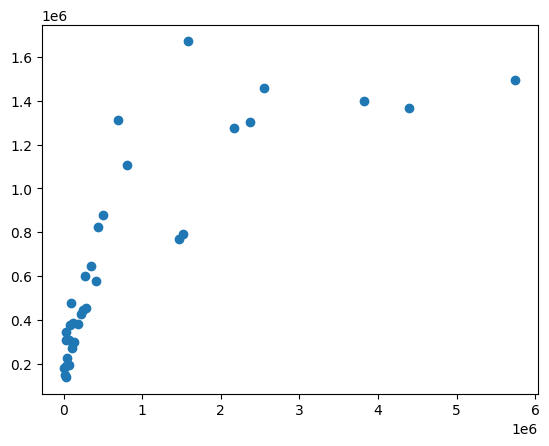

In [ ]:
fig, ax = plt.subplots()

ax.scatter(y_test, scaler_dict  [Target].inverse_transform (random_search.predict (X_test).reshape (-1,1) ))
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

reg_cv.score (X_cv,y_cv) 0.8936254056654495
reg_cv.intercept [0.45741085]


'\ndata_input [(data_input [fold_y_g_pred ] < data_input [Target].max() ) *\n            (data_input [fold_y_g_pred ] > data_input [Target].min() )\n             ].plot.scatter (Target , fold_y_g_pred )\n'

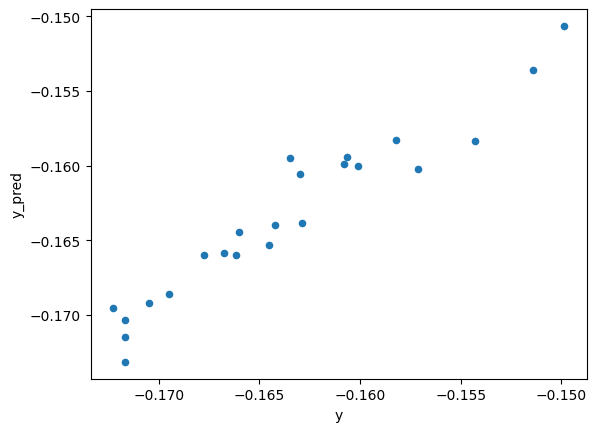

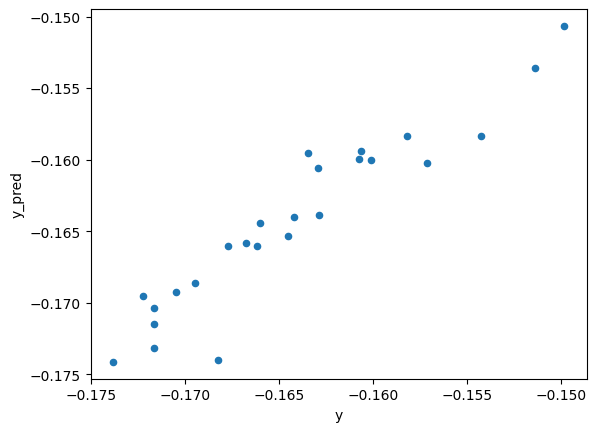

In [ ]:
param_col_list  = ["param_" +i for i in list (param_distributions.keys()) ]
performance_list = ["mean_test_score" ] #"mean_fit_time"  , mean_test_score  , "rank_test_score"
cv_cols = np.concatenate ([param_col_list ,  performance_list ]).tolist()

cv_df = pd.DataFrame (random_search.cv_results_) [cv_cols]
cv_df = cv_df.dropna()

X_cv = cv_df.iloc [:,:-1]
y_cv = cv_df.iloc [:,-1]

X_cv_scaler = MinMaxScaler ()
y_cv_scaler = MinMaxScaler ()

X_cv_scaled = X_cv_scaler.fit_transform (X_cv)
y_cv_scaled = y_cv_scaler.fit_transform (y_cv.values.reshape (-1,1))


reg_cv = LinearRegression ()
reg_cv.fit (X_cv_scaled , y_cv_scaled)

y_pred_cv = reg_cv.predict (X_cv_scaled)

print ('reg_cv.score (X_cv,y_cv)' , reg_cv.score (X_cv_scaled,y_cv_scaled))


cv_df ["y"]         = y_cv_scaled
cv_df ["y_pred"]    = y_pred_cv

cv_df ["y"]         = y_cv
cv_df ["y_pred"]    = y_cv_scaler.inverse_transform (y_pred_cv)


cv_df [(cv_df ["y_pred" ] < cv_df ["y"].max() ) *
            (cv_df ["y_pred" ] > cv_df ["y"].min() )
             ].plot.scatter ("y" , "y_pred" )

cv_df.plot.scatter ("y" , "y_pred" )

print ("reg_cv.intercept",reg_cv.intercept_)


'''
fig, ax = plt.subplots()

ax.scatter(y_cv,y_pred_cv)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

print ("reg_cv.coef_",reg_cv.coef_)
'''

'''
data_input [(data_input [fold_y_g_pred ] < data_input [Target].max() ) *
            (data_input [fold_y_g_pred ] > data_input [Target].min() )
             ].plot.scatter (Target , fold_y_g_pred )
'''

In [ ]:
reg_cv.coef_.tolist() [0]

[0.0,
 2.7755575615628914e-17,
 -0.5014728523807777,
 0.057719700390672694,
 0.40535959163023444,
 0.0980174896610439,
 0.17608309928270427]

In [ ]:
reg_cv.coef_.tolist() [0]

[0.0,
 2.7755575615628914e-17,
 -0.5014728523807777,
 0.057719700390672694,
 0.40535959163023444,
 0.0980174896610439,
 0.17608309928270427]

In [ ]:
for col,coef in zip (X_cv.columns , reg_cv.coef_.tolist() [0]):
  print ('param_col_list' , col ,coef)
  print ()
#Rank

param_col_list param_preprocessor__num__poly_minmax__poly__degree -0.5114444164971595

param_col_list param_preprocessor__num__poly_minmax__poly__interaction_only -0.16324790252439927

param_col_list param_preprocessor__num__symbolic_transform_pipeline__symbolic_transform__population_size 0.08076014948979218

param_col_list param_preprocessor__num__symbolic_transform_pipeline__symbolic_transform__generations 0.31879281102164053

param_col_list param_preprocessor__num__symbolic_transform_pipeline__symbolic_transform__n_components -0.060381517783894896

param_col_list param_regressor__n_estimators 0.016710023536222224

param_col_list param_regressor__max_depth 0.211777290165565

param_col_list param_regressor__max_features 0.19679165709770868



<Axes: >

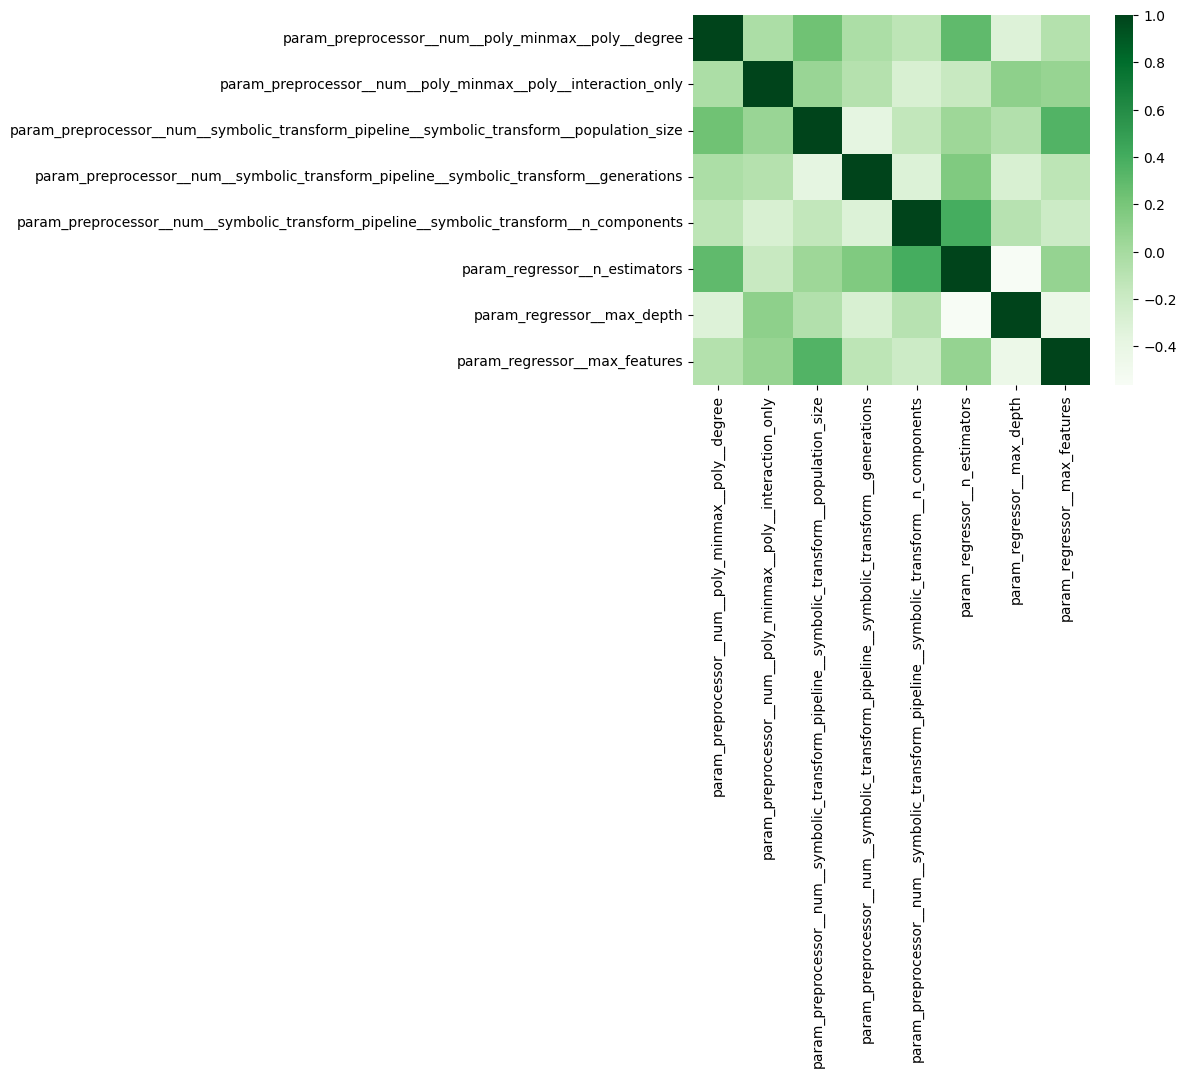

In [ ]:
import seaborn as sns

df = pd.DataFrame (X_cv_scaled , columns = X_cv.columns)

sns.heatmap(df.corr(),cmap='Greens',annot=False)


reg_cv.score (X_cv,y_cv) 0.9762750020447987
param_col_list param_preprocessor__num__poly_minmax__poly__degree 0.04603500682277511
param_col_list param_preprocessor__num__poly_minmax__poly__interaction_only -0.010423587643574494
param_col_list param_preprocessor__num__symbolic_transform_pipeline__symbolic_transform__population_size 0.16992034831553063
param_col_list param_preprocessor__num__symbolic_transform_pipeline__symbolic_transform__generations 0.5128016429529513
param_col_list param_preprocessor__num__symbolic_transform_pipeline__symbolic_transform__n_components 0.044325562328937716
param_col_list param_regressor__n_estimators 0.492178311136794
param_col_list param_regressor__max_depth -0.03019552732301744
param_col_list param_regressor__max_features 0.21614432810544235
reg_cv.intercept [-0.28484853]


'\ndata_input [(data_input [fold_y_g_pred ] < data_input [Target].max() ) *\n            (data_input [fold_y_g_pred ] > data_input [Target].min() )\n             ].plot.scatter (Target , fold_y_g_pred )\n'

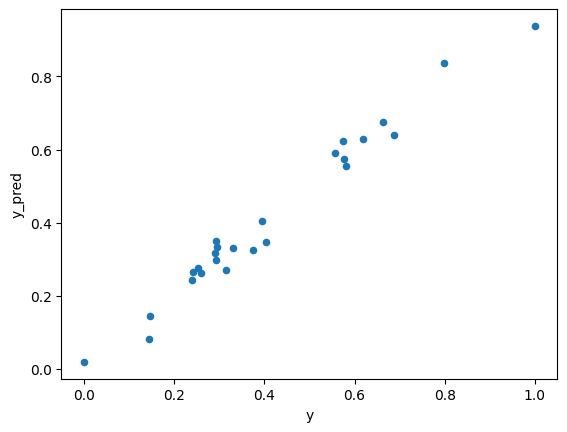

In [ ]:
param_col_list  = ["param_" +i for i in list (param_distributions.keys()) ]
performance_list = ["mean_fit_time" ] #""
cv_cols = np.concatenate ([param_col_list ,  performance_list ]).tolist()

cv_df = pd.DataFrame (random_search.cv_results_) [cv_cols]


X_cv = cv_df.iloc [:,:-1]
y_cv = cv_df.iloc [:,-1]

X_cv_scaler = MinMaxScaler ()
y_cv_scaler = MinMaxScaler ()

X_cv_scaled = X_cv_scaler.fit_transform (X_cv)
y_cv_scaled = y_cv_scaler.fit_transform (y_cv.values.reshape (-1,1))


reg_cv = LinearRegression ()
reg_cv.fit (X_cv_scaled , y_cv_scaled)

y_pred_cv = reg_cv.predict (X_cv_scaled)

print ('reg_cv.score (X_cv,y_cv)' , reg_cv.score (X_cv_scaled,y_cv_scaled))


cv_df ["y"]         = y_cv_scaled
cv_df ["y_pred"]    = y_pred_cv

cv_df [(cv_df ["y_pred" ] < cv_df ["y"].max() ) *
            (cv_df ["y_pred" ] > cv_df ["y"].min() )
             ].plot.scatter ("y" , "y_pred" )

for col,coef in zip (X_cv.columns , reg_cv.coef_.tolist() [0]): print ('param_col_list' ,col  ,coef)

print ("reg_cv.intercept",reg_cv.intercept_)


'''
fig, ax = plt.subplots()

ax.scatter(y_cv,y_pred_cv)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

print ("reg_cv.coef_",reg_cv.coef_)
'''

'''
data_input [(data_input [fold_y_g_pred ] < data_input [Target].max() ) *
            (data_input [fold_y_g_pred ] > data_input [Target].min() )
             ].plot.scatter (Target , fold_y_g_pred )
'''

reg_cv.score (X_cv,y_cv) 0.0005713543611566285
param_col_list Index(['mean_fit_time'], dtype='object') reg_cv.coef_ [[0.02224467]]
reg_cv.intercept [0.48819034]


'\ndata_input [(data_input [fold_y_g_pred ] < data_input [Target].max() ) *\n            (data_input [fold_y_g_pred ] > data_input [Target].min() )\n             ].plot.scatter (Target , fold_y_g_pred )\n'

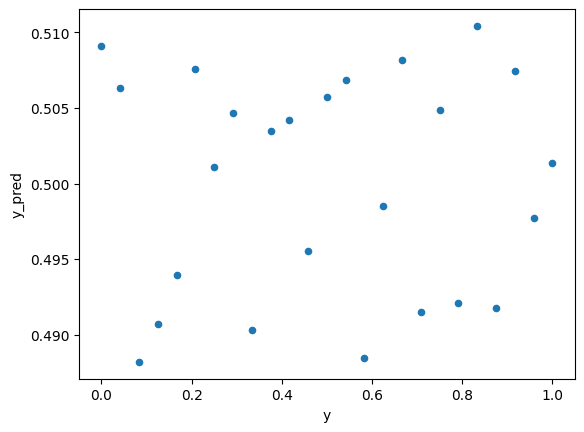

In [ ]:
param_col_list  = []
performance_list = ["mean_fit_time" , "rank_test_score"] #""
cv_cols = np.concatenate ([param_col_list ,  performance_list ]).tolist()

cv_df = pd.DataFrame (random_search.cv_results_) [cv_cols]


X_cv = cv_df.iloc [:,:-1]
y_cv = cv_df.iloc [:,-1]

X_cv_scaler = MinMaxScaler ()
y_cv_scaler = MinMaxScaler ()

X_cv_scaled = X_cv_scaler.fit_transform (X_cv)
y_cv_scaled = y_cv_scaler.fit_transform (y_cv.values.reshape (-1,1))


reg_cv = LinearRegression ()
reg_cv.fit (X_cv_scaled , y_cv_scaled)

y_pred_cv = reg_cv.predict (X_cv_scaled)

print ('reg_cv.score (X_cv,y_cv)' , reg_cv.score (X_cv_scaled,y_cv_scaled))


cv_df ["y"]         = y_cv_scaled
cv_df ["y_pred"]    = y_pred_cv

cv_df [(cv_df ["y_pred" ] < cv_df ["y"].max() ) *
            (cv_df ["y_pred" ] > cv_df ["y"].min() )
             ].plot.scatter ("y" , "y_pred" )

for col,coef in zip (X_cv.columns , reg_cv.coef_): print ('param_col_list' ,X_cv.columns  , "reg_cv.coef_",reg_cv.coef_)

print ("reg_cv.intercept",reg_cv.intercept_)


'''
fig, ax = plt.subplots()

ax.scatter(y_cv,y_pred_cv)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

print ("reg_cv.coef_",reg_cv.coef_)
'''

'''
data_input [(data_input [fold_y_g_pred ] < data_input [Target].max() ) *
            (data_input [fold_y_g_pred ] > data_input [Target].min() )
             ].plot.scatter (Target , fold_y_g_pred )
'''

In [ ]:
from scipy.stats import randint
randint(10, 200).rvs()

59

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from gplearn.genetic import SymbolicTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from tqdm import tqdm
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from tqdm import tqdm
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold




# Define the polynomial features followed by MinMax scaling part of the pipeline
poly_minmax_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('minmax_scaler', MinMaxScaler())
])

# FeatureUnion to combine PolynomialFeatures + MinMaxScaler and SymbolicTransformer
combined_features = FeatureUnion([
    ("poly_minmax", poly_minmax_pipeline),
    ("symbolic_transform", SymbolicTransformer(generations=20, population_size=2000,
                                                 hall_of_fame=100, n_components=10,
                                                 function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 'inv', 'max', 'min'),
                                                 parsimony_coefficient=0.0005, max_samples=0.9, verbose=0,n_jobs=-1)),
])

'''
# Final pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('features', combined_features),
    ('linear_regression', LinearRegression())
])
'''

# Define a placeholder pipeline with a generic 'regressor' step
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('features', combined_features),
    ('regressor', LinearRegression())  # Placeholder, will be replaced by RandomizedSearchCV
])


# Define the parameter space for RandomizedSearchCV
param_distributions = {
    'features__poly_minmax__poly__degree': randint (1,3),
    'features__symbolic_transform__population_size': randint (1000,10000),
    'features__symbolic_transform__generations': randint (1,5),
    'features__symbolic_transform__n_components': randint (1,10),
    #'regressor': np.random.choice ([LinearRegression()]),
    'regressor__fit_intercept': [True, False],
}

# Number of iterations for randomized search
n_iter = 100

# Prepare for cross-validation
cv = KFold(n_splits=2, shuffle=True, random_state=42)

# Sample parameters and track progress with tqdm
best_score  = -10000000000
best_params = None
params_list = []
scores_list = []

for _ in tqdm(range(n_iter), desc='Randomized Search Progress'):
    # Sample a set of parameters
    #sampled_params = {param: dist.rvs() for param, dist in param_distributions.items()}
    sampled_params = {param: dist.rvs() if hasattr(dist, 'rvs') else random.choice(dist) for param, dist in param_distributions.items()}
    params_list.append (sampled_params)

    # Set model parameters
    pipeline.set_params(**sampled_params)

    # Evaluate the model using cross-validation
    scores = cross_val_score(pipeline, X_train, y_train_scaled.ravel(), cv=cv,n_jobs=-1)
    mean_score = np.mean(scores)
    scores_list.append (mean_score)

    # Update best score and parameters if current model is better
    if mean_score > best_score:
        best_score = mean_score
        best_params = sampled_params

# Display the best parameters and score
print(f"Best Score: {best_score}")
print(f"Best Parameters: {best_params}")



Randomized Search Progress:  17%|█▋        | 17/100 [07:27<36:23, 26.31s/it]


KeyboardInterrupt: 

In [ ]:
y_pred = pipeline.predict (X_test)

array([  591439.08229131,   752530.9228889 , -2685583.91928316,
         -15949.37247386,  1386020.36586994,  2072085.01477079,
        -582067.61219902,   958334.72112473,  -282400.49041108,
        -100129.63709688,  -850413.03179482,  1756504.74515103,
         728158.70727665,   164461.59477663,   121538.97280892,
         495743.64308018,  1559183.32853212,   689948.69526136,
         452811.9186288 ,  -445194.60458677, -1264937.35765752,
         553769.69960764,  2570068.84127389,  1299666.55151188,
         831721.32820484,   627386.86654907,   502997.28455903,
         620596.42004627,   440017.92440524,  1102738.32040988,
       -1741952.23913559,   263106.96055655,    46857.16924342,
         992946.46955271])

In [ ]:
pipeline.score (X_test , y_test)

-0.1292929381334582

In [ ]:
import random

poly_scaler_dict = {}
poly           = PolynomialFeatures(3,interaction_only=True)
poly_fit       = poly.fit (X_train)

interaction_df = pd.DataFrame ( poly_fit.transform(X) )
interaction_df_rename_dict = {}
for col in interaction_df.columns : interaction_df_rename_dict [col] = str (col) + "_poly"
interaction_df.rename (interaction_df_rename_dict,axis =1, inplace=True)
sel_col_indicies        = list ( set ( [ random.randint (0,int (interaction_df.shape [1] * 0.3) - X.shape [1] ) for _ in range (int (interaction_df.shape [1] * 1))] ) )
print (interaction_df.shape)
interaction_df  = interaction_df.T.drop_duplicates().T
print (max (sel_col_indicies) , interaction_df.shape [1] , sel_col_indicies  )
interaction_df = interaction_df.iloc [:,sel_col_indicies]
print (interaction_df.shape)

interaction_df_train = interaction_df.loc [train_indicies]
for col in interaction_df.columns :
  try :
    #c1 = type (X [col])   == type (X ["PC"])
    #c2 = type (X [col])   == type (X ["Price_Decay"])
    #c  = c1 | c2
    #if c:
    #if col != grouping_col :
      poly_scaler_dict [col] = MinMaxScaler().fit (interaction_df_train [col].values.reshape (-1,1))
  except :
    continue
print (poly_scaler_dict)
for col in interaction_df.columns :
    if col in poly_scaler_dict.keys() :
      interaction_df [col]                      =  poly_scaler_dict [col].transform (interaction_df [col].values.reshape (-1,1))

(114, 93)
19 93 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
(114, 20)
{'0_poly': MinMaxScaler(), '1_poly': MinMaxScaler(), '2_poly': MinMaxScaler(), '3_poly': MinMaxScaler(), '4_poly': MinMaxScaler(), '5_poly': MinMaxScaler(), '6_poly': MinMaxScaler(), '7_poly': MinMaxScaler(), '8_poly': MinMaxScaler(), '9_poly': MinMaxScaler(), '10_poly': MinMaxScaler(), '11_poly': MinMaxScaler(), '12_poly': MinMaxScaler(), '13_poly': MinMaxScaler(), '14_poly': MinMaxScaler(), '15_poly': MinMaxScaler(), '16_poly': MinMaxScaler(), '17_poly': MinMaxScaler(), '18_poly': MinMaxScaler(), '19_poly': MinMaxScaler()}


In [ ]:
for col in X.columns :
  try :
    #c1 = type (X [col])   == type (X ["PC"])
    #c2 = type (X [col])   == type (X ["Price_Decay"])
    #c  = c1 | c2
    #if c:
    #if col != grouping_col :
      scaler_dict [col] = StandardScaler().fit (X_train [col].values.reshape (-1,1))
  except :
    continue
print (scaler_dict)

scaler_dict  [Target] = StandardScaler().fit (y_train.values.reshape (-1,1))

print (scaler_dict)

#print ( col , scaler_dict [col].transform (X [col].values.reshape (-1,1)) )
if scale_features :
  for col in X.columns :
    if col in scaler_dict.keys() :
      X [col]                      =  scaler_dict [col].transform (X [col].values.reshape (-1,1))
  y                                =  scaler_dict [Target].transform (y.values.reshape (-1,1))
  y = pd.Series ( y.reshape (-1) )

{'LPB': StandardScaler(), 'Year': StandardScaler(), 'LP': StandardScaler(), 'LTIV': StandardScaler(), 'Price_Decay': StandardScaler(), 'Price_R2': StandardScaler(), 'TIV_Decay': StandardScaler(), 'TIV_R2': StandardScaler()}
{'LPB': StandardScaler(), 'Year': StandardScaler(), 'LP': StandardScaler(), 'LTIV': StandardScaler(), 'Price_Decay': StandardScaler(), 'Price_R2': StandardScaler(), 'TIV_Decay': StandardScaler(), 'TIV_R2': StandardScaler(), 'Profit': StandardScaler()}


In [ ]:
y

0     -0.701497
1     -0.517761
2      0.753245
3     -0.617494
4     -0.545146
         ...   
109   -0.732612
110   -0.659082
111   -0.349535
112    0.074627
113   -0.334164
Length: 114, dtype: float64

In [ ]:
one_hot_df = pd.get_dummies (X [grouping_col])
one_hot_df_rename_dict = {}
for col in one_hot_df.columns : one_hot_df_rename_dict [col] = str (col) + "_"
one_hot_df.rename (one_hot_df_rename_dict,axis =1, inplace=True)
one_hot_df

,-1.8364285000041605_,-1.2191416092464593_,-0.6018547184887585_,0.015432172268942524_,0.6327190630266435_,1.2500059537843444_,1.8672928445420454_,2.4845797352997465_
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
109,0,1,0,0,0,0,0,0
110,0,1,0,0,0,0,0,0
111,0,1,0,0,0,0,0,0
112,0,1,0,0,0,0,0,0


In [ ]:
if one_hot :
   X = X.join (one_hot_df)

In [ ]:
if drop_grouping_var :  X = X.drop (grouping_col,axis =1 )

In [ ]:
interaction_df.shape

(114, 20)

In [ ]:
if interaction :
   X = X.join (interaction_df)
   X_train       = X.loc [train_indicies]
   X_test        = X.loc [test_indicies]
   y_train       = y.loc [train_indicies]
   y_test        = y.loc [test_indicies]
#X.join (one_hot_df).join (interaction_df)

In [ ]:
X

,Year,LP,LTIV,Price_Decay,Price_R2,TIV_Decay,TIV_R2,-1.8364285000041605_,-1.2191416092464593_,-0.6018547184887585_,...,10_poly,11_poly,12_poly,13_poly,14_poly,15_poly,16_poly,17_poly,18_poly,19_poly
0,0.402015,2.297781,2.688829,-1.120221,0.282477,-0.981968,-0.036201,0,0,0,...,1.016719,1.039782,0.026091,0.915334,0.046034,0.919357,1.024281,1.052487,0.194698,0.825415
1,0.402015,2.209180,2.483232,-0.312389,0.471802,-0.944999,0.487788,0,0,0,...,1.000000,1.000000,0.202922,0.938239,0.053888,0.978101,1.000000,1.000000,0.393950,0.862726
2,0.402015,2.172224,2.195472,-0.409148,0.509785,-0.973679,0.683121,0,0,0,...,0.993026,0.944320,0.181742,0.942834,0.047795,1.000000,0.989872,0.926537,0.370084,0.870211
3,-0.603023,2.191353,2.188808,-1.239414,0.982307,-1.198642,0.178327,0,0,0,...,0.996636,0.943030,0.000000,1.000000,0.000000,0.943408,0.994301,0.924137,0.165954,0.962304
4,0.402015,2.019600,1.827317,-0.583918,0.242639,-0.062761,-0.303703,0,0,0,...,0.854438,0.773250,0.246404,0.792245,0.339378,0.758548,0.948046,0.832550,0.326977,0.817564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-1.608061,-1.291558,-1.150069,-0.847848,0.824229,-0.886313,0.529760,0,1,0,...,0.055568,0.043637,0.737888,0.229038,0.759654,0.141830,0.039952,0.071897,0.263093,0.930156
110,-1.608061,-1.370919,-1.144899,-0.721838,0.446227,-0.959629,0.588296,0,1,0,...,0.049578,0.044037,0.748921,0.210746,0.753424,0.144455,0.018225,0.073215,0.294142,0.855736
111,-1.608061,-1.288478,-1.216915,-1.427868,0.664495,-1.300016,0.378991,0,1,0,...,0.055801,0.038463,0.687103,0.221308,0.724497,0.135069,0.040795,0.054848,0.120173,0.898708
112,-1.608061,-1.207636,-1.198590,0.292577,-0.025033,0.168419,0.685359,0,1,0,...,0.061903,0.039881,0.837742,0.187941,0.849288,0.148808,0.062928,0.059522,0.544099,0.762957


In [ ]:
y

0     -0.701497
1     -0.517761
2      0.753245
3     -0.617494
4     -0.545146
         ...   
109   -0.732612
110   -0.659082
111   -0.349535
112    0.074627
113   -0.334164
Length: 114, dtype: float64

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = reg.predict (X)

In [ ]:
reg.coef_

array([ 2.73383674e+12, -2.88829297e+03,  1.15732361e+03,  1.32613830e+03,
        1.18942547e+03, -1.63428872e-01,  6.54385196e-01, -2.62267323e+03,
       -1.87358076e+03, -1.12421378e+03, -3.75528017e+02,  3.74260004e+02,
        1.12408070e+03,  1.87357244e+03,  2.62406597e+03,  2.28881836e-05,
        4.49696490e+03, -8.24282791e+12, -7.92043093e+02,  2.95525821e+02,
        3.26527109e+02,  2.33796271e+02, -4.34473199e-02,  1.34718547e-01,
       -9.75288089e+03,  7.12793248e-01, -4.91178718e+00,  1.68126213e+01,
        1.84642934e+01, -5.96497042e-01, -5.83194044e+00,  1.13393401e+04,
       -4.82842934e+03, -5.70895901e+03, -6.27202304e+03])

In [ ]:
reg.score (X,y)

0.274201005390999

In [ ]:
if scale_features :
  data_input [pred_col_name] = scaler_dict [Target].inverse_transform (y_pred.reshape (-1,1)).reshape (-1)
else :
  data_input [pred_col_name] = y_pred

In [ ]:
data_input

,LPB,MMC,Year,LP,LTIV,PC,Price_Decay,Price_R2,TIV_Decay,TIV_R2,Profit,Profit_Pred
0,1000,iPhone XS Max_512GB_Verizon,2018,1029.35,656.816,19,-0.001192,0.894662,-0.001335,0.879887,41381,-1.237176e+06
1,1000,iPhone XS Max_512GB_Unlocked,2018,1014.39,634.388,20,-0.001009,0.911918,-0.001326,0.918513,227473,7.706661e+05
2,1000,iPhone XS Max_256GB_Unlocked,2018,1008.15,602.997,20,-0.001031,0.915380,-0.001333,0.932912,1514777,7.988550e+05
3,1000,iPhone X_256GB_Verizon,2017,1011.38,602.270,19,-0.001220,0.958448,-0.001388,0.895701,126462,3.072800e+05
4,900,iPhone XS Max_256GB_Verizon,2018,982.38,562.836,20,-0.001070,0.891031,-0.001114,0.860168,199737,9.314316e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
109,400,iPhone 7_256GB_T-Mobile,2016,423.30,238.041,17,-0.001130,0.944040,-0.001312,0.921607,9867,7.207173e+05
110,400,iPhone 7_128GB_T-Mobile,2016,409.90,238.605,19,-0.001102,0.909587,-0.001330,0.925922,84340,4.506972e+05
111,400,iPhone 7_32GB_AT&T,2016,423.82,230.749,20,-0.001262,0.929481,-0.001412,0.910493,397857,-3.158433e+05
112,400,iPhone 7 Plus_32GB_T-Mobile,2016,437.47,232.748,19,-0.000871,0.866634,-0.001058,0.933077,827457,6.480196e+05


In [ ]:
data_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   LPB          114 non-null    category
 1   MMC          114 non-null    object  
 2   Year         114 non-null    int64   
 3   LP           114 non-null    float64 
 4   LTIV         114 non-null    float64 
 5   PC           114 non-null    int64   
 6   Price_Decay  114 non-null    float64 
 7   Price_R2     114 non-null    float64 
 8   TIV_Decay    114 non-null    float64 
 9   TIV_R2       114 non-null    float64 
 10  Profit       114 non-null    int64   
 11  Profit_Pred  114 non-null    float64 
dtypes: category(1), float64(7), int64(3), object(1)
memory usage: 10.4+ KB


In [ ]:
#data_input.plot.scatter ("Profit" , "Profit_Pred")

NameError: name 'y_pred' is not defined

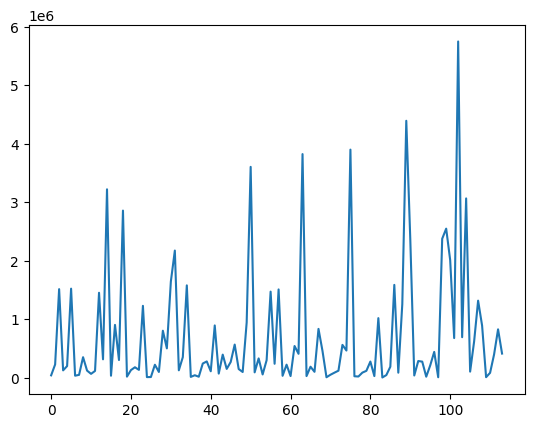

In [ ]:
fig, ax = plt.subplots()

ax.plot([i for i in range (y.shape [0]) ], y)
ax.plot([i for i in range (y.shape [0]) ], y_pred ,color ="red")
plt.show()

In [ ]:
X

,Year,LP,LTIV,Price_Decay,Price_R2,TIV_Decay,TIV_R2,-1.8364285000041605_,-1.2191416092464593_,-0.6018547184887585_,...,10_poly,11_poly,12_poly,13_poly,14_poly,15_poly,16_poly,17_poly,18_poly,19_poly
0,0.402015,2.297781,2.688829,-1.120221,0.282477,-0.981968,-0.036201,0,0,0,...,1.016719,1.039782,0.026091,0.915334,0.046034,0.919357,1.024281,1.052487,0.194698,0.825415
1,0.402015,2.209180,2.483232,-0.312389,0.471802,-0.944999,0.487788,0,0,0,...,1.000000,1.000000,0.202922,0.938239,0.053888,0.978101,1.000000,1.000000,0.393950,0.862726
2,0.402015,2.172224,2.195472,-0.409148,0.509785,-0.973679,0.683121,0,0,0,...,0.993026,0.944320,0.181742,0.942834,0.047795,1.000000,0.989872,0.926537,0.370084,0.870211
3,-0.603023,2.191353,2.188808,-1.239414,0.982307,-1.198642,0.178327,0,0,0,...,0.996636,0.943030,0.000000,1.000000,0.000000,0.943408,0.994301,0.924137,0.165954,0.962304
4,0.402015,2.019600,1.827317,-0.583918,0.242639,-0.062761,-0.303703,0,0,0,...,0.854438,0.773250,0.246404,0.792245,0.339378,0.758548,0.948046,0.832550,0.326977,0.817564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-1.608061,-1.291558,-1.150069,-0.847848,0.824229,-0.886313,0.529760,0,1,0,...,0.055568,0.043637,0.737888,0.229038,0.759654,0.141830,0.039952,0.071897,0.263093,0.930156
110,-1.608061,-1.370919,-1.144899,-0.721838,0.446227,-0.959629,0.588296,0,1,0,...,0.049578,0.044037,0.748921,0.210746,0.753424,0.144455,0.018225,0.073215,0.294142,0.855736
111,-1.608061,-1.288478,-1.216915,-1.427868,0.664495,-1.300016,0.378991,0,1,0,...,0.055801,0.038463,0.687103,0.221308,0.724497,0.135069,0.040795,0.054848,0.120173,0.898708
112,-1.608061,-1.207636,-1.198590,0.292577,-0.025033,0.168419,0.685359,0,1,0,...,0.061903,0.039881,0.837742,0.187941,0.849288,0.148808,0.062928,0.059522,0.544099,0.762957


In [ ]:

#population_size=4000 , generations=100 , hall_of_fame=200 , n_components=10
gp = SymbolicTransformer(generations=generations, population_size=population_size,
hall_of_fame=hall_of_fame, n_components=n_components,
function_set=function_set_trans,
parsimony_coefficient=parsimony_coefficient_trans,
max_samples=0.9, verbose=1,
random_state=0, n_jobs=-1)

gp.fit(X_train, y_train)

gp_features = gp.transform(X)

gp_features_df = pd.DataFrame (gp_features)
gp_features_rename_dict = {}
for col in gp_features_df.columns : gp_features_rename_dict [col] = str (col) + "_"
gp_features_df.rename (gp_features_rename_dict  , axis =1 ,inplace=True)

X = X.join (gp_features_df)
X_train       = X.loc [train_indicies]
X_test        = X.loc [test_indicies]
y_train       = y.loc [train_indicies]
y_test        = y.loc [test_indicies]

reg    = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict (X)




print ( 'reg.score (X,y)'            , reg.score (X,y))
print ('reg.score (X_train,y_train)' , reg.score (X_train,y_train))
print ('reg.score (X_test,y_test)'   , reg.score (X_test,y_test))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    10.49        0.0814154       39         0.348858         0.125686     17.09s
   1    12.72          0.15788       20         0.387531         0.104589      6.37s
   2    13.38         0.187806       33         0.447514          0.16327      5.61s
   3    15.12         0.201719       20         0.496535         0.626991      5.82s
   4    24.12         0.219704       20         0.534471         0.301336      4.62s
   5    32.14         0.247597       56         0.548805         0.819797      7.13s
   6    37.79         0.284561       69         0.616783         0.225604      4.98s
   7    35.40         0.340355       53         0.642962        0.0231784      2.28s
   8    41.69         0.372287       80         0.678511         0.669253  

In [ ]:
X = X.drop (gp_features_df,axis=1)
gp_features = gp.transform(X)
#new_diabetes = np.hstack((diabetes.data, gp_features))

In [ ]:
gp_features

array([[-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       ...,
       [ 6.33671200e-01,  3.24361579e-02, -4.63520973e-02, ...,
         1.16854450e-01, -3.68781250e-01, -6.46539509e+09],
       [ 1.36130263e+01, -1.90726409e-01,  1.29236043e-01, ...,
         2.64621619e-01, -4.58797534e-01,  5.72579590e+10],
       [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00]])

In [ ]:
gp_features.shape

(114, 50)

In [ ]:
np.hstack((X.values, gp_features))

array([[ 3.28564370e-01,  2.34596186e+00,  2.74680808e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [ 3.28564370e-01,  2.25190746e+00,  2.53291180e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [ 3.28564370e-01,  2.21267622e+00,  2.23353521e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       ...,
       [-1.64282185e+00, -1.46104072e+00, -1.31660130e+00, ...,
         1.16854450e-01, -3.68781250e-01, -6.46539509e+09],
       [-1.64282185e+00, -1.37522237e+00, -1.29753680e+00, ...,
         2.64621619e-01, -4.58797534e-01,  5.72579590e+10],
       [-1.64282185e+00, -1.61922311e+00, -1.27239721e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00]])

In [ ]:
gp_features_df = pd.DataFrame (gp_features)
gp_features_rename_dict = {}
for col in gp_features_df.columns : gp_features_rename_dict [col] = str (col) + "_"
gp_features_df.rename (gp_features_rename_dict  , axis =1 ,inplace=True)
gp_features_df

,0_,1_,2_,3_,4_,5_,6_,7_,8_,9_,...,40_,41_,42_,43_,44_,45_,46_,47_,48_,49_
0,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.005451,-0.000000,0.000000,-0.000000,0.000000,...,0.000000,-0.000000,-0.000000,5.450686,0.535502,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
1,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.001406,-0.000000,0.000000,-0.000000,0.000000,...,0.000000,-0.000000,-0.000000,1.405797,0.244633,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
2,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000859,-0.000000,0.000000,-0.000000,0.000000,...,0.000000,-0.000000,-0.000000,0.859032,0.155889,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
3,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.003237,-0.000000,0.000000,-0.000000,0.000000,...,0.000000,-0.000000,-0.000000,3.237149,0.471407,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
4,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2.580641,0.032252,-0.048726,-3616.301567,31.170070,-5072.459452,-2.184131,0.013713,-13192.186709,0.358851,...,0.009172,-0.048726,0.017776,-61112.249672,192.154318,276.894949,-11.504173,0.102855,-0.397141,-2.830884e+10
110,0.731506,-0.025702,0.036232,2104.708103,54.497773,4056.056077,-0.669802,-0.010937,12119.460198,-0.168633,...,-0.007784,0.036232,0.003260,-7107.671363,-65.800995,-206.831756,-25.250262,0.176545,-0.452283,1.180708e+10
111,0.633671,0.032436,-0.046352,-3076.216264,39.019246,-6091.381937,-0.442521,0.009417,-11653.415635,0.526852,...,0.007826,-0.046352,0.002352,-7640.736132,66.766107,267.710815,-14.354730,0.116854,-0.368781,-6.465395e+09
112,13.613026,-0.190726,0.129236,9966.864519,73.666329,10885.320336,-12.780124,-0.050808,41371.048432,-1.571688,...,-0.023536,0.129236,0.039029,-109015.750263,-252.652608,-713.334202,-29.277572,0.264622,-0.458798,5.725796e+10


In [ ]:

#X = X.drop (gp_features_df,axis=1)

X = X.join (gp_features_df)
X

,Year,LP,LTIV,Price_Decay,Price_R2,TIV_Decay,TIV_R2,-2.0235481185165343_,-1.3773730890742797_,-0.7311980596320249_,...,40_,41_,42_,43_,44_,45_,46_,47_,48_,49_
0,0.328564,2.345962,2.746808,-1.063660,0.254197,-1.007627,0.142488,0,0,0,...,0.000000,-0.000000,-0.000000,5.450686,0.535502,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
1,0.328564,2.251907,2.532912,-0.279537,0.451914,-0.972083,0.538486,0,0,0,...,0.000000,-0.000000,-0.000000,1.405797,0.244633,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
2,0.328564,2.212676,2.233535,-0.373456,0.491581,-0.999657,0.686106,0,0,0,...,0.000000,-0.000000,-0.000000,0.859032,0.155889,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
3,-0.657129,2.232983,2.226602,-1.179355,0.985050,-1.215951,0.304615,0,0,0,...,0.000000,-0.000000,-0.000000,3.237149,0.471407,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
4,0.328564,2.050659,1.850519,-0.543097,0.212593,-0.123845,-0.059673,0,0,0,...,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-1.642822,-1.464310,-1.247057,-0.799281,0.819965,-0.915658,0.570206,0,1,0,...,0.009172,-0.048726,0.017776,-61112.249672,192.154318,276.894949,-11.504173,0.102855,-0.397141,-2.830884e+10
110,-1.642822,-1.548557,-1.241678,-0.676969,0.425206,-0.986149,0.614444,0,1,0,...,-0.007784,0.036232,0.003260,-7107.671363,-65.800995,-206.831756,-25.250262,0.176545,-0.452283,1.180708e+10
111,-1.642822,-1.461041,-1.316601,-1.362277,0.653149,-1.313418,0.456264,0,1,0,...,0.007826,-0.046352,0.002352,-7640.736132,66.766107,267.710815,-14.354730,0.116854,-0.368781,-6.465395e+09
112,-1.642822,-1.375222,-1.297537,0.307674,-0.066945,0.098426,0.687798,0,1,0,...,-0.023536,0.129236,0.039029,-109015.750263,-252.652608,-713.334202,-29.277572,0.264622,-0.458798,5.725796e+10


In [ ]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict (X)

In [ ]:
reg.score (X,y)

-9.000463985718417

In [ ]:
X_train       = X.loc [train_indicies]
X_test        = X.loc [test_indicies]
y_train       = y.loc [train_indicies]
y_test        = y.loc [test_indicies]

In [ ]:
reg.score (X_train,y_train)

0.9505300237791671

In [ ]:
reg.score (X_test,y_test)

-27.16903559731706

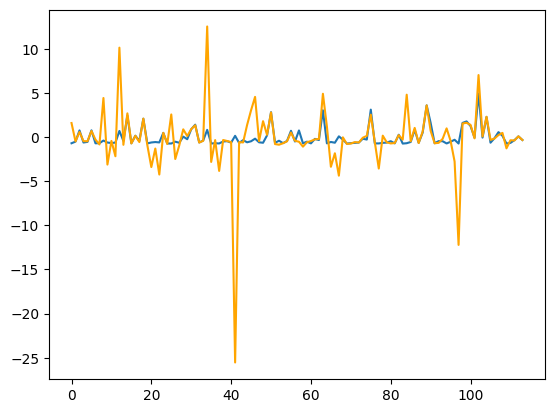

In [ ]:
fig, ax = plt.subplots()

ax.plot([i for i in range (y.shape [0]) ], y)
ax.plot([i for i in range (y.shape [0]) ], y_pred ,color ="orange")
plt.show()

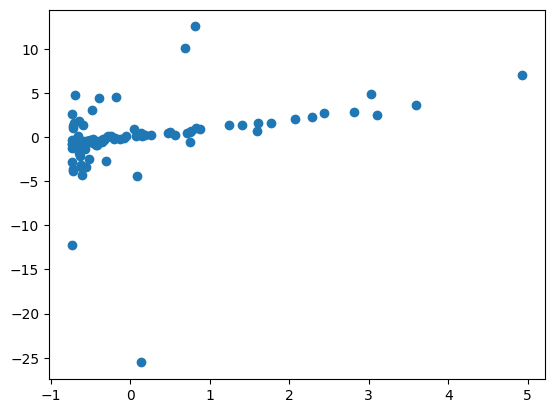

In [ ]:
fig, ax = plt.subplots()

ax.scatter(y,y_pred)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

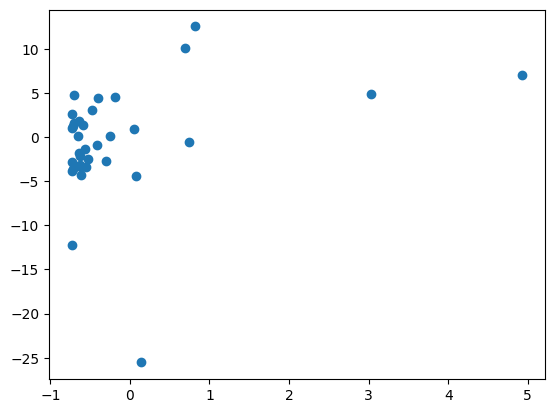

In [ ]:
fig, ax = plt.subplots()

ax.scatter(y.loc [test_indicies],pd.Series (y_pred).loc[test_indicies])
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

In [ ]:
# Creating and training the symbolic regressor
#parsimony_coefficient=0.0001 ,  generations=50
function_set = ['add', 'sub', 'mul', 'div' , 'sqrt', 'log', 'abs', 'neg', 'inv']
est_gp = SymbolicRegressor(population_size=10000,
                           generations=5, stopping_criteria=0.1,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.1, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           function_set=function_set,
                           parsimony_coefficient=0.00000000000001, random_state=0,n_jobs=-1)
est_gp.fit(X, y)



    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     8.38      1.77874e+22        4          0.53947          0.85718     25.04s
   1     6.60      5.36263e+17       29          0.49823          1.30843     27.55s
   2     6.94      1.54325e+12        2         0.505548          1.71147     20.42s
   3     7.59      5.56695e+11       10         0.474133          1.35068      8.46s
   4     8.50      1.08291e+12        4         0.454699          1.57774      0.00s


SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs', 'neg', 'inv'],
                  generations=5, max_samples=0.9, n_jobs=-1, p_crossover=0.7,
                  p_hoist_mutation=0.1, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=1e-14,
                  population_size=10000, random_state=0, stopping_criteria=0.1,
                  verbose=1)

In [ ]:
# Making predictions
y_pred_g = est_gp.predict(X)

# Evaluating the model
print("Model expression:", est_gp._program)
print("Mean Squared Error:", mean_squared_error(y, y_pred_g))


Model expression: sub(X59, abs(0.402))
Mean Squared Error: 1.102181748859987


In [ ]:
est_gp.score(X,y)

-0.10218174885998699

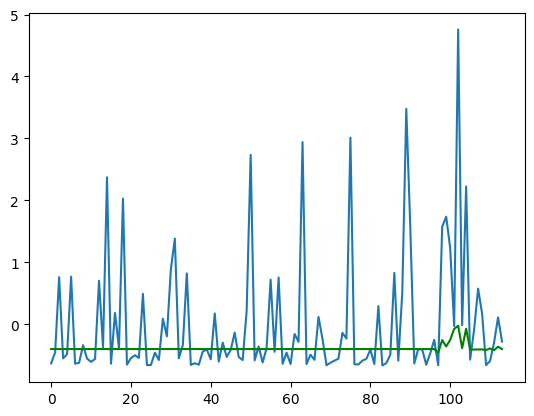

In [ ]:
fig, ax = plt.subplots()

ax.plot([i for i in range (y.shape [0]) ], y)
ax.plot([i for i in range (y.shape [0]) ], y_pred_g ,color ="green")
plt.show()

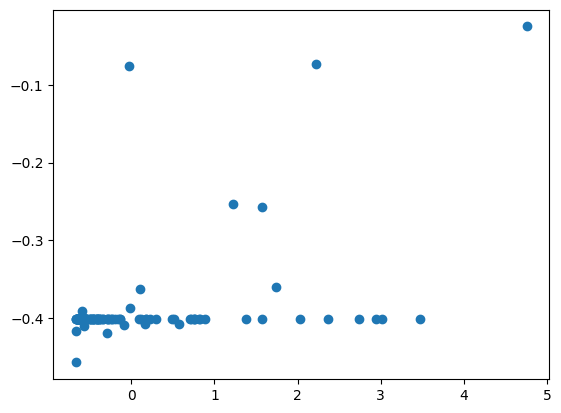

In [ ]:
fig, ax = plt.subplots()

ax.scatter(y,y_pred_g)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

In [ ]:
X.shape [0] // number_of_test_per_fold

114

In [ ]:
kf              = KFold(n_splits=X.shape [0] // number_of_test_per_fold , shuffle= True )

fold_number     = 0

kfold_pred_dict = {fold_test_index :np.array([])  ,
                   fold_y_pred     : np.array ([]) ,
                   }

kfold_pred_list = []
model_NN = MLPRegressor(
    hidden_layer_sizes=(250, 200, 100, 100,100),  # More layers and different numbers of neurons
    activation='tanh',  # Different activation function
    solver='sgd',  # Different optimizer
    learning_rate_init=0.01,  # Initial learning rate
    learning_rate='adaptive',  # Adaptive learning rate
    max_iter=1000,  # More iterations
    batch_size=64,  # Smaller batch size
    alpha=0.0001,  # L2 regularization
    early_stopping=True,  # Enable early stopping
    n_iter_no_change=20,  # Patience for early stopping
    random_state=0
)

for i, (train_index, test_index) in enumerate(kf.split(X)):
      print(f"Fold {i}:")
      print(f"  Train: index={train_index}")
      print(f"  Test:  index={test_index}")

      X_train_fold  = X.loc [train_index]
      X_test_fold   = X.loc [test_index]

      y_train_fold  = y.loc [train_index]
      y_test_fold   = y.loc [test_index]

      reg_fold = LinearRegression().fit(X_train_fold, y_train_fold)
      #reg_fold = model_NN.fit(X_train_fold, y_train_fold)

      fold_y_pred_value = scaler_dict [Target].inverse_transform (reg_fold.predict (X_test_fold).reshape (-1,1))

      kfold_pred_dict [fold_test_index] =  test_index
      kfold_pred_dict [fold_y_pred]     =  fold_y_pred_value.reshape (-1)
      kfold_pred_dict [fold_num ]       =  i

      kfold_pred_list.append (pd.DataFrame ( kfold_pred_dict))


      print ( kfold_pred_dict)

kfold_pred_df = pd.concat (kfold_pred_list)


Fold 0:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 107 108
 109 110 111 112 113]
  Test:  index=[106]
{'fold_test_index': array([106]), 'fold_y_pred': array([-7.93155962e+08]), 'fold_num': 0}
Fold 1:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  

In [ ]:
data_input = data_input.merge (kfold_pred_df.set_index (fold_test_index) , how = "left" , left_index = True , right_index = True)
data_input

,LPB,MMC,Year,LP,LTIV,PC,Price_Decay,Price_R2,TIV_Decay,TIV_R2,Profit,Profit_Pred,fold_y_pred,fold_num
0,1000,iPhone XS Max_512GB_Verizon,2018,1029.35,656.816,19,-0.001192,0.894662,-0.001335,0.879887,41381,-531899.697988,-2.291341e+06,9
1,1000,iPhone XS Max_512GB_Unlocked,2018,1014.39,634.388,20,-0.001009,0.911918,-0.001326,0.918513,227473,790518.041632,9.519541e+05,92
2,1000,iPhone XS Max_256GB_Unlocked,2018,1008.15,602.997,20,-0.001031,0.915380,-0.001333,0.932912,1514777,736038.014269,2.593205e+05,109
3,1000,iPhone X_256GB_Verizon,2017,1011.38,602.270,19,-0.001220,0.958448,-0.001388,0.895701,126462,915436.593137,-6.221203e+05,48
4,900,iPhone XS Max_256GB_Verizon,2018,982.38,562.836,20,-0.001070,0.891031,-0.001114,0.860168,199737,-786018.700838,6.485786e+06,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,400,iPhone 7_256GB_T-Mobile,2016,423.30,238.041,17,-0.001130,0.944040,-0.001312,0.921607,9867,535338.497667,-9.084934e+09,35
110,400,iPhone 7_128GB_T-Mobile,2016,409.90,238.605,19,-0.001102,0.909587,-0.001330,0.925922,84340,427041.757517,-4.666813e+09,4
111,400,iPhone 7_32GB_AT&T,2016,423.82,230.749,20,-0.001262,0.929481,-0.001412,0.910493,397857,481107.547500,9.407326e+09,70
112,400,iPhone 7 Plus_32GB_T-Mobile,2016,437.47,232.748,19,-0.000871,0.866634,-0.001058,0.933077,827457,676207.107730,7.003193e+09,51


In [ ]:
kfold_pred_df.shape

(114, 3)

In [ ]:
kfold_pred_df [fold_test_index].duplicated().sum ()

0

<Axes: xlabel='Profit', ylabel='fold_y_pred'>

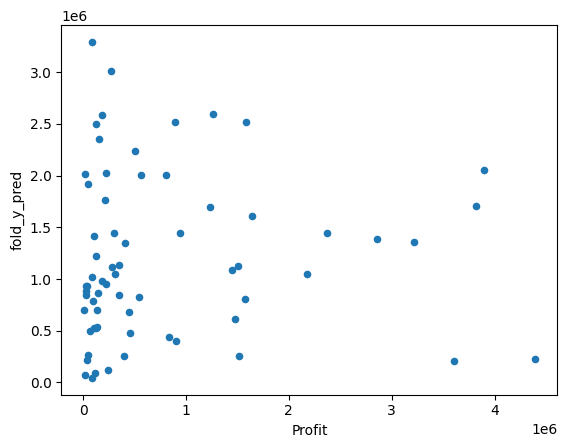

In [ ]:
data_input [(data_input [fold_y_pred] < data_input [Target].max() ) *
            (data_input [fold_y_pred] > data_input [Target].min() )
             ].plot.scatter (Target , fold_y_pred)

         Year        LP      LTIV  Price_Decay  Price_R2  TIV_Decay    TIV_R2
0    0.328564  2.345962  2.746808    -1.063660  0.254197  -1.007627  0.142488
1    0.328564  2.251907  2.532912    -0.279537  0.451914  -0.972083  0.538486
2    0.328564  2.212676  2.233535    -0.373456  0.491581  -0.999657  0.686106
3   -0.657129  2.232983  2.226602    -1.179355  0.985050  -1.215951  0.304615
4    0.328564  2.050659  1.850519    -0.543097  0.212593  -0.123845 -0.059673
..        ...       ...       ...          ...       ...        ...       ...
109 -1.642822 -1.464310 -1.247057    -0.799281  0.819965  -0.915658  0.570206
110 -1.642822 -1.548557 -1.241678    -0.676969  0.425206  -0.986149  0.614444
111 -1.642822 -1.461041 -1.316601    -1.362277  0.653149  -1.313418  0.456264
112 -1.642822 -1.375222 -1.297537     0.307674 -0.066945   0.098426  0.687798
113 -1.642822 -1.619223 -1.272397    -1.355946  0.602780  -1.676351  0.532734

[114 rows x 7 columns]
Fold 0:
  Train: index=[  0   1   2   3 

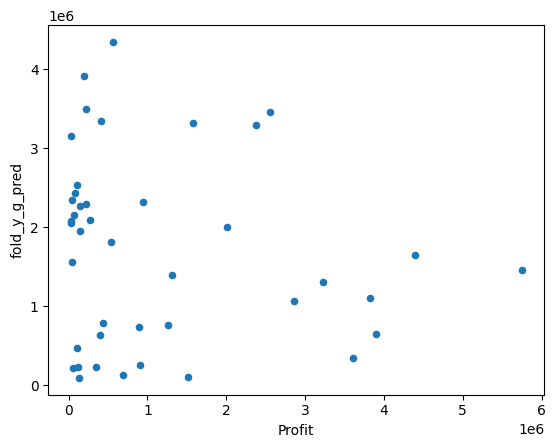

In [ ]:

if Kfold_symbolic :
    kf              = KFold(n_splits=X.shape [0] // number_of_test_per_fold , shuffle= True )

    fold_number     = 0

    kfold_pred_dict = {fold_test_index :np.array([])  ,
                      fold_y_g_pred      : np.array ([]) ,
                      }

    kfold_pred_list = []


    for i, (train_index, test_index) in enumerate(kf.split(X)):
          if gp_features_df.columns [0] in X.columns :
            X = X.drop (gp_features_df,axis =1)
          if interaction_df.columns [0] in X.columns :
            X = X.drop (interaction_df,axis =1)
          print (X)
          print(f"Fold {i}:")
          print(f"  Train: index={train_index}")
          print(f"  Test:  index={test_index}")

          X_train_fold  = X.loc [train_index]
          X_test_fold   = X.loc [test_index]

          y_train_fold  = y.loc [train_index]
          y_test_fold   = y.loc [test_index]

          gp = SymbolicTransformer(generations=generations, population_size=population_size,
          hall_of_fame=hall_of_fame, n_components=n_components,
          function_set=function_set_trans,
          parsimony_coefficient=parsimony_coefficient_trans,
          max_samples=0.9, verbose=1,
          random_state=0, n_jobs=-1)

          gp.fit(X_train_fold, y_train_fold)

          gp_features = gp.transform(X)

          gp_features_df = pd.DataFrame (gp_features)
          gp_features_rename_dict = {}
          for col in gp_features_df.columns : gp_features_rename_dict [col] = str (col) + "_"
          gp_features_df.rename (gp_features_rename_dict  , axis =1 ,inplace=True)

          X = X.join (gp_features_df)

          poly           = PolynomialFeatures(2,interaction_only=False)
          interaction_df = pd.DataFrame ( poly.fit_transform(X) )
          interaction_df_rename_dict = {}
          for col in interaction_df.columns : interaction_df_rename_dict [col] = str (col) + "_poly"
          interaction_df.rename (interaction_df_rename_dict,axis =1, inplace=True)
          sel_col_indicies        = [ random.randint (0, interaction_df.shape [1]-X.shape [1] -1) for _ in range (int (interaction_df.shape [1] * 0.01))]
          print (interaction_df.shape)
          interaction_df  = interaction_df.T.drop_duplicates().T
          interaction_df  = interaction_df.iloc [:,sel_col_indicies]

          X = X.join (interaction_df)

          X_train_fold  = X.loc [train_index]
          X_test_fold   = X.loc [test_index]

          y_train_fold  = y.loc [train_index]
          y_test_fold   = y.loc [test_index]

          reg_fold = LinearRegression().fit(X_train_fold, y_train_fold)
          #reg_fold = est_gp.fit(X_train_fold, y_train_fold)
          #reg_fold = model_NN.fit(X_train_fold, y_train_fold)

          fold_y_pred_value = scaler_dict [Target].inverse_transform (reg_fold.predict (X_test_fold).reshape (-1,1))

          kfold_pred_dict [fold_test_index]   =  test_index
          kfold_pred_dict [fold_y_g_pred]     =  fold_y_pred_value.reshape (-1)
          kfold_pred_dict [fold_num ]         =  i

          kfold_pred_list.append (pd.DataFrame ( kfold_pred_dict))



          print ( kfold_pred_dict)

    kfold_pred_df = pd.concat (kfold_pred_list)

    data_input = data_input.merge (kfold_pred_df.set_index (fold_test_index) , how = "left" , left_index = True , right_index = True)

    data_input [(data_input [fold_y_g_pred ] < data_input [Target].max() ) *
            (data_input [fold_y_g_pred ] > data_input [Target].min() )
             ].plot.scatter (Target , fold_y_g_pred )
